# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
from TRAIN.architecture.archeader import bert



Chosen class grouping: all-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes exists. Continuing with execution
device: mps
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/distilbert-base-uncased exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/prajjwal1/bert

In [3]:
import pandas as pd
from datetime import datetime

In [4]:
TRAIN_classes = 'ten-classes'

In [5]:
exploringBERT = bert.BERT_TINY
exploring_num_epochs = 1000

# Model training

## Active Hand prediction

In [6]:
sup.bert_score_tracker = []

updating best... 0.9917703733440385
	{'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 3, 'data_unit': 'AHpf', 'label_col': 'active_hand', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 3}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/AHpf/prajjwal1/bert-tiny does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/AHpf/prajjwal1/bert-tiny does not exist. Creating it and continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.9933761541549578
	{'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 7, 'data_unit': 'AHpf', 'label_col': 'active_hand', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 7}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/AHpf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/AHpf/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.9943797671617824
	{'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 15, 'data_unit': 'AHpf', 'label_col': 'active_hand', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 15}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/AHpf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/AHpf/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Data Unit: AHpf
Best score: 0.9943797671617824
Best data config: {'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 15, 'data_unit': 'AHpf', 'label_col': 'active_hand', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 15}
Best train config: {'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}


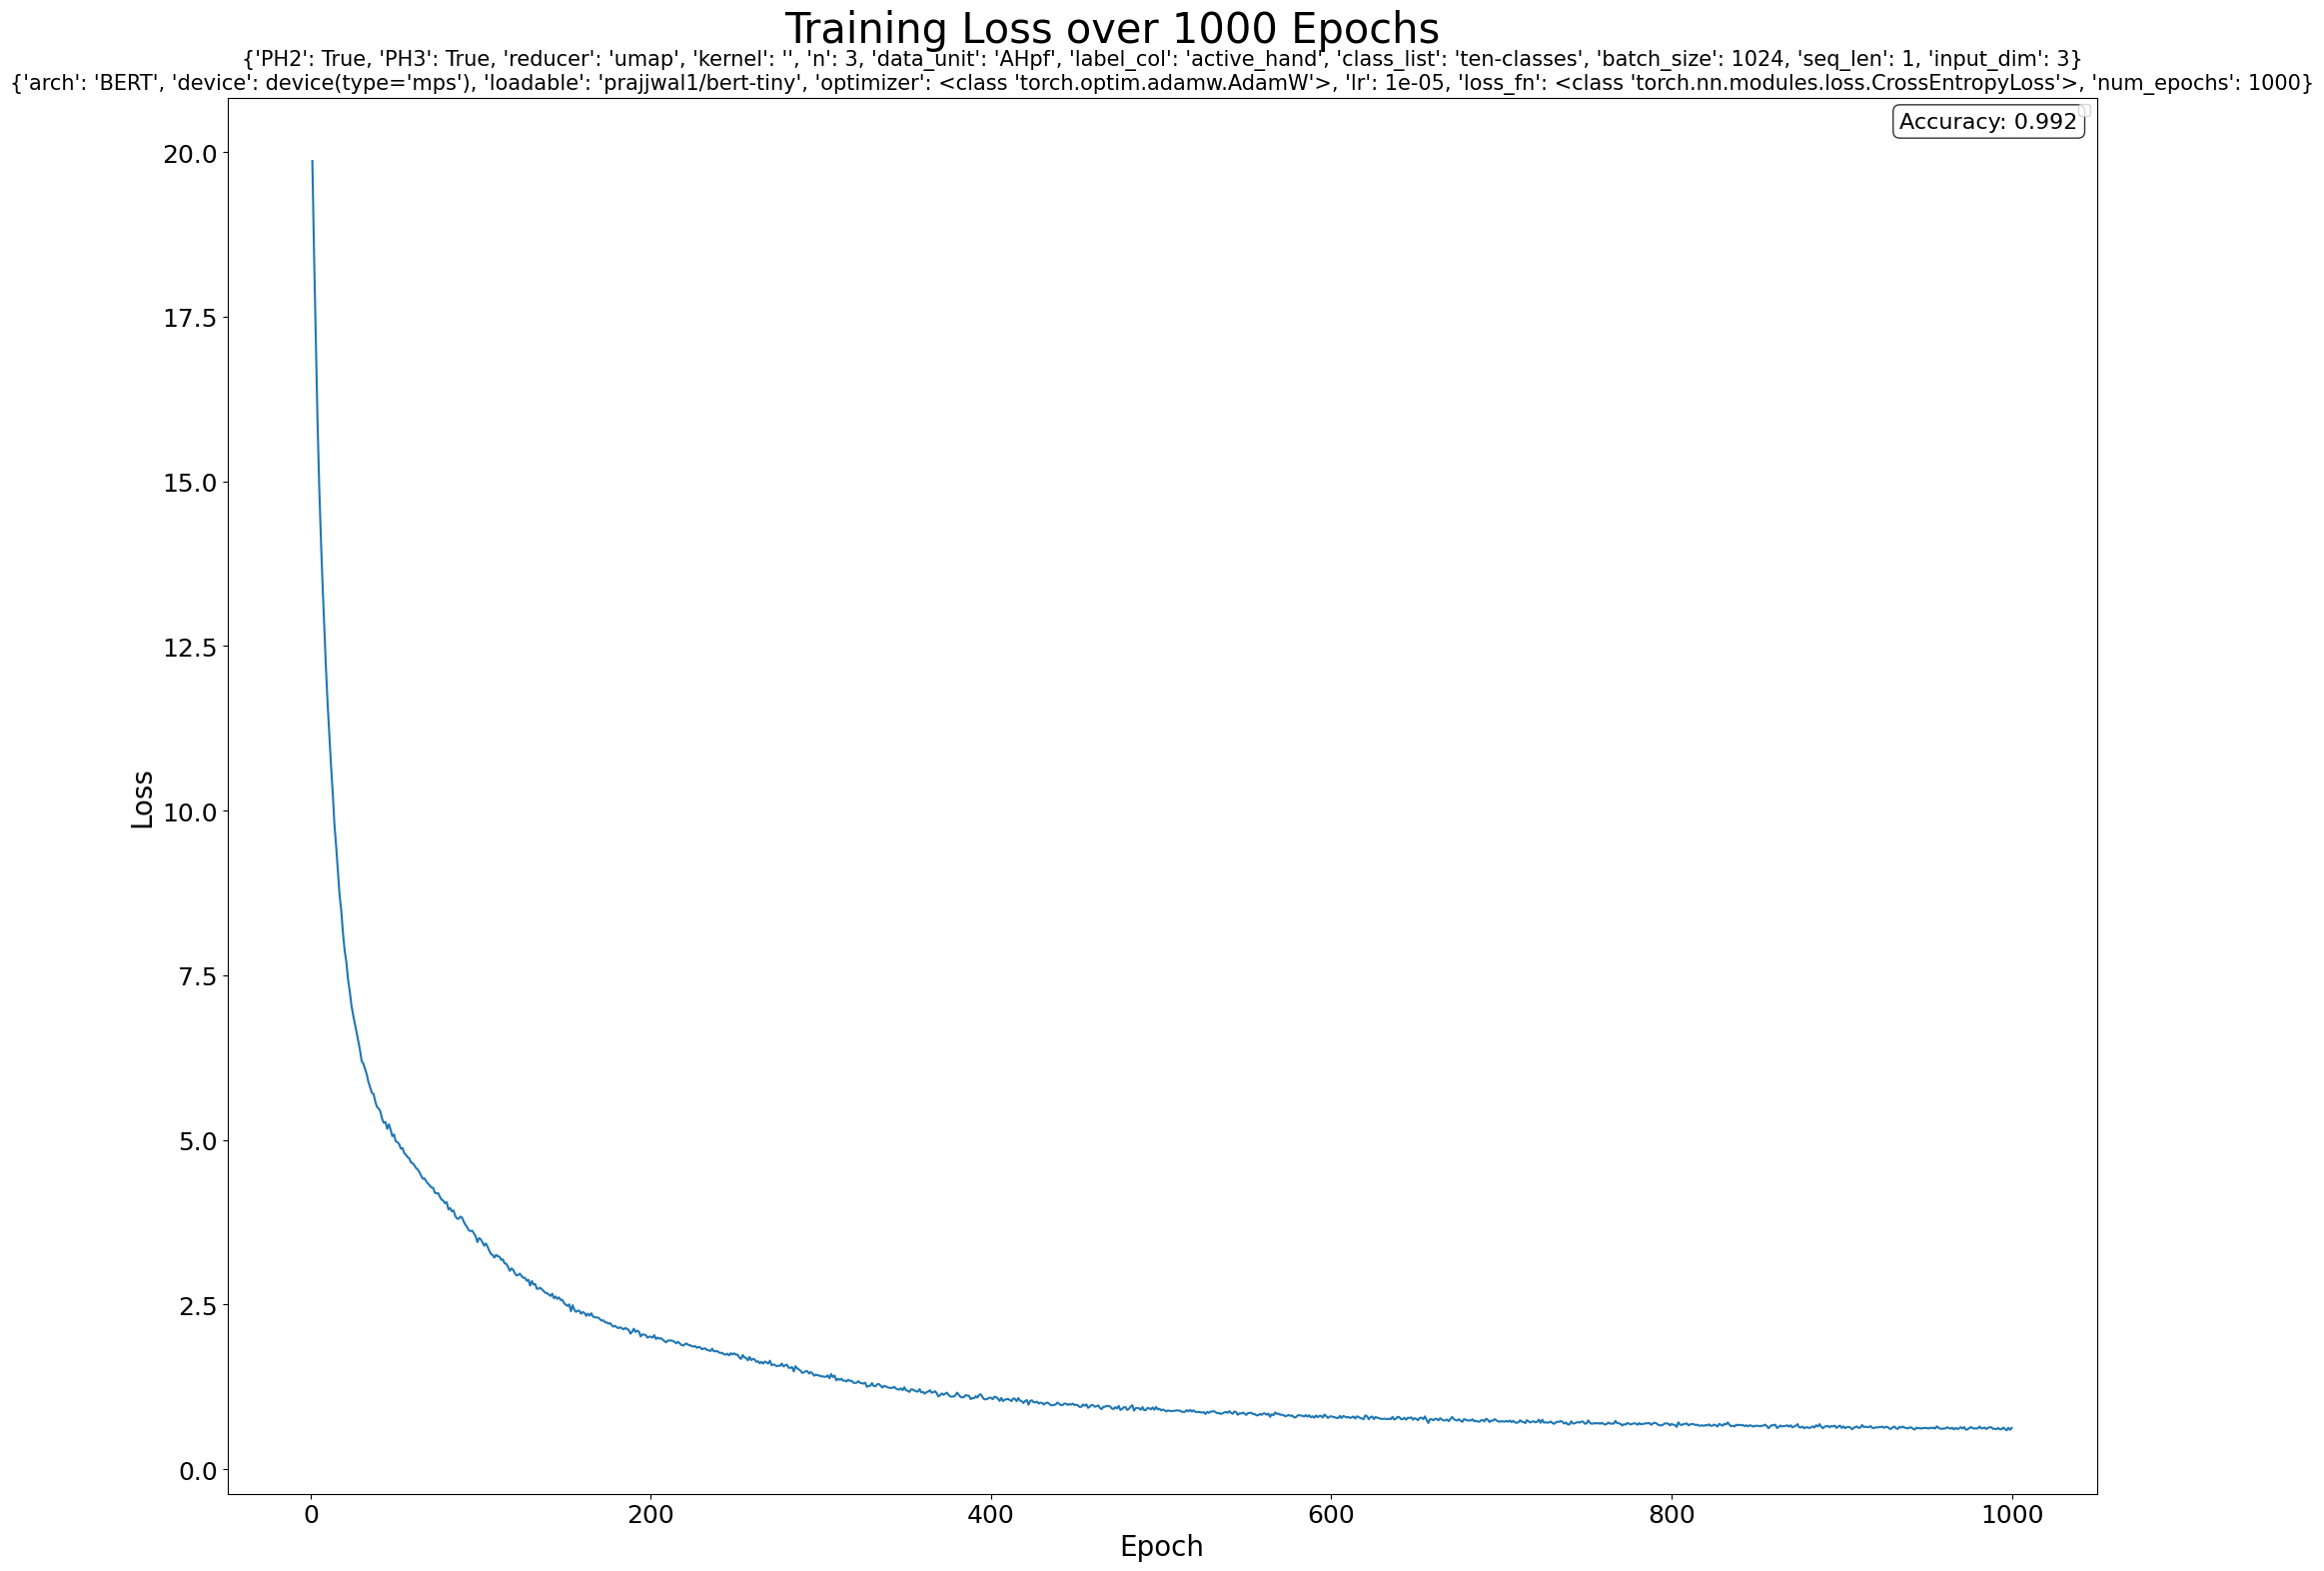

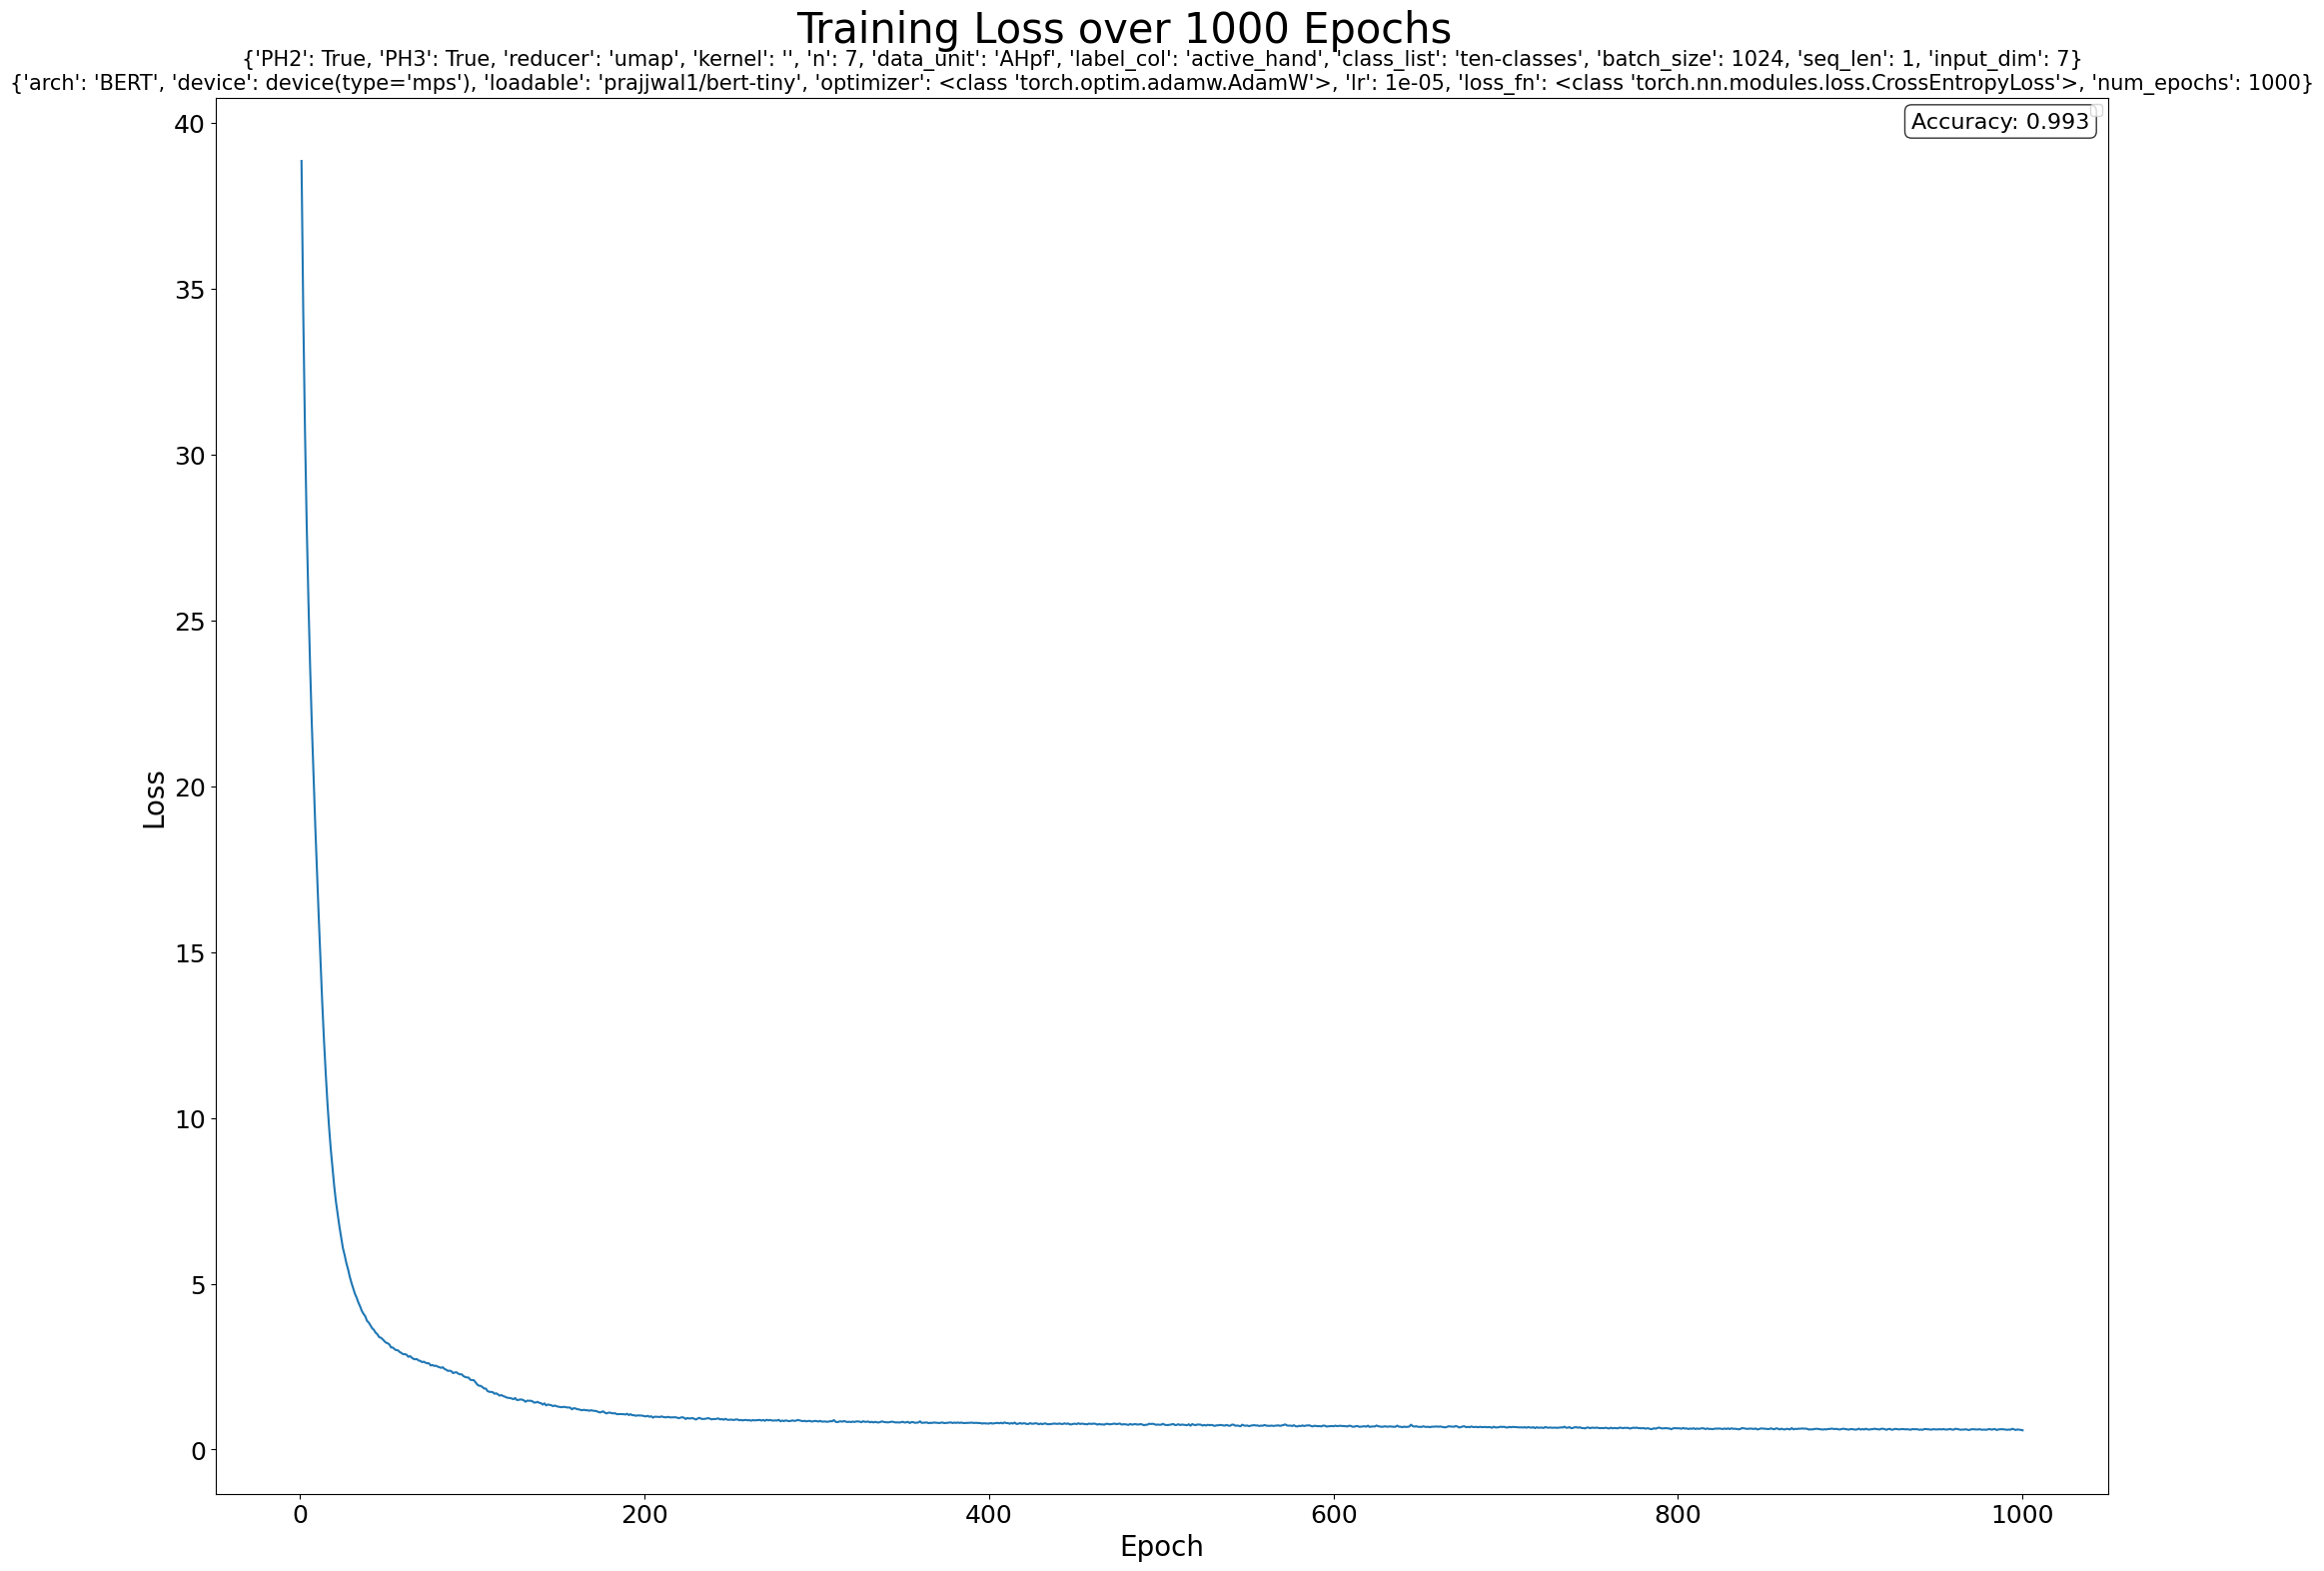

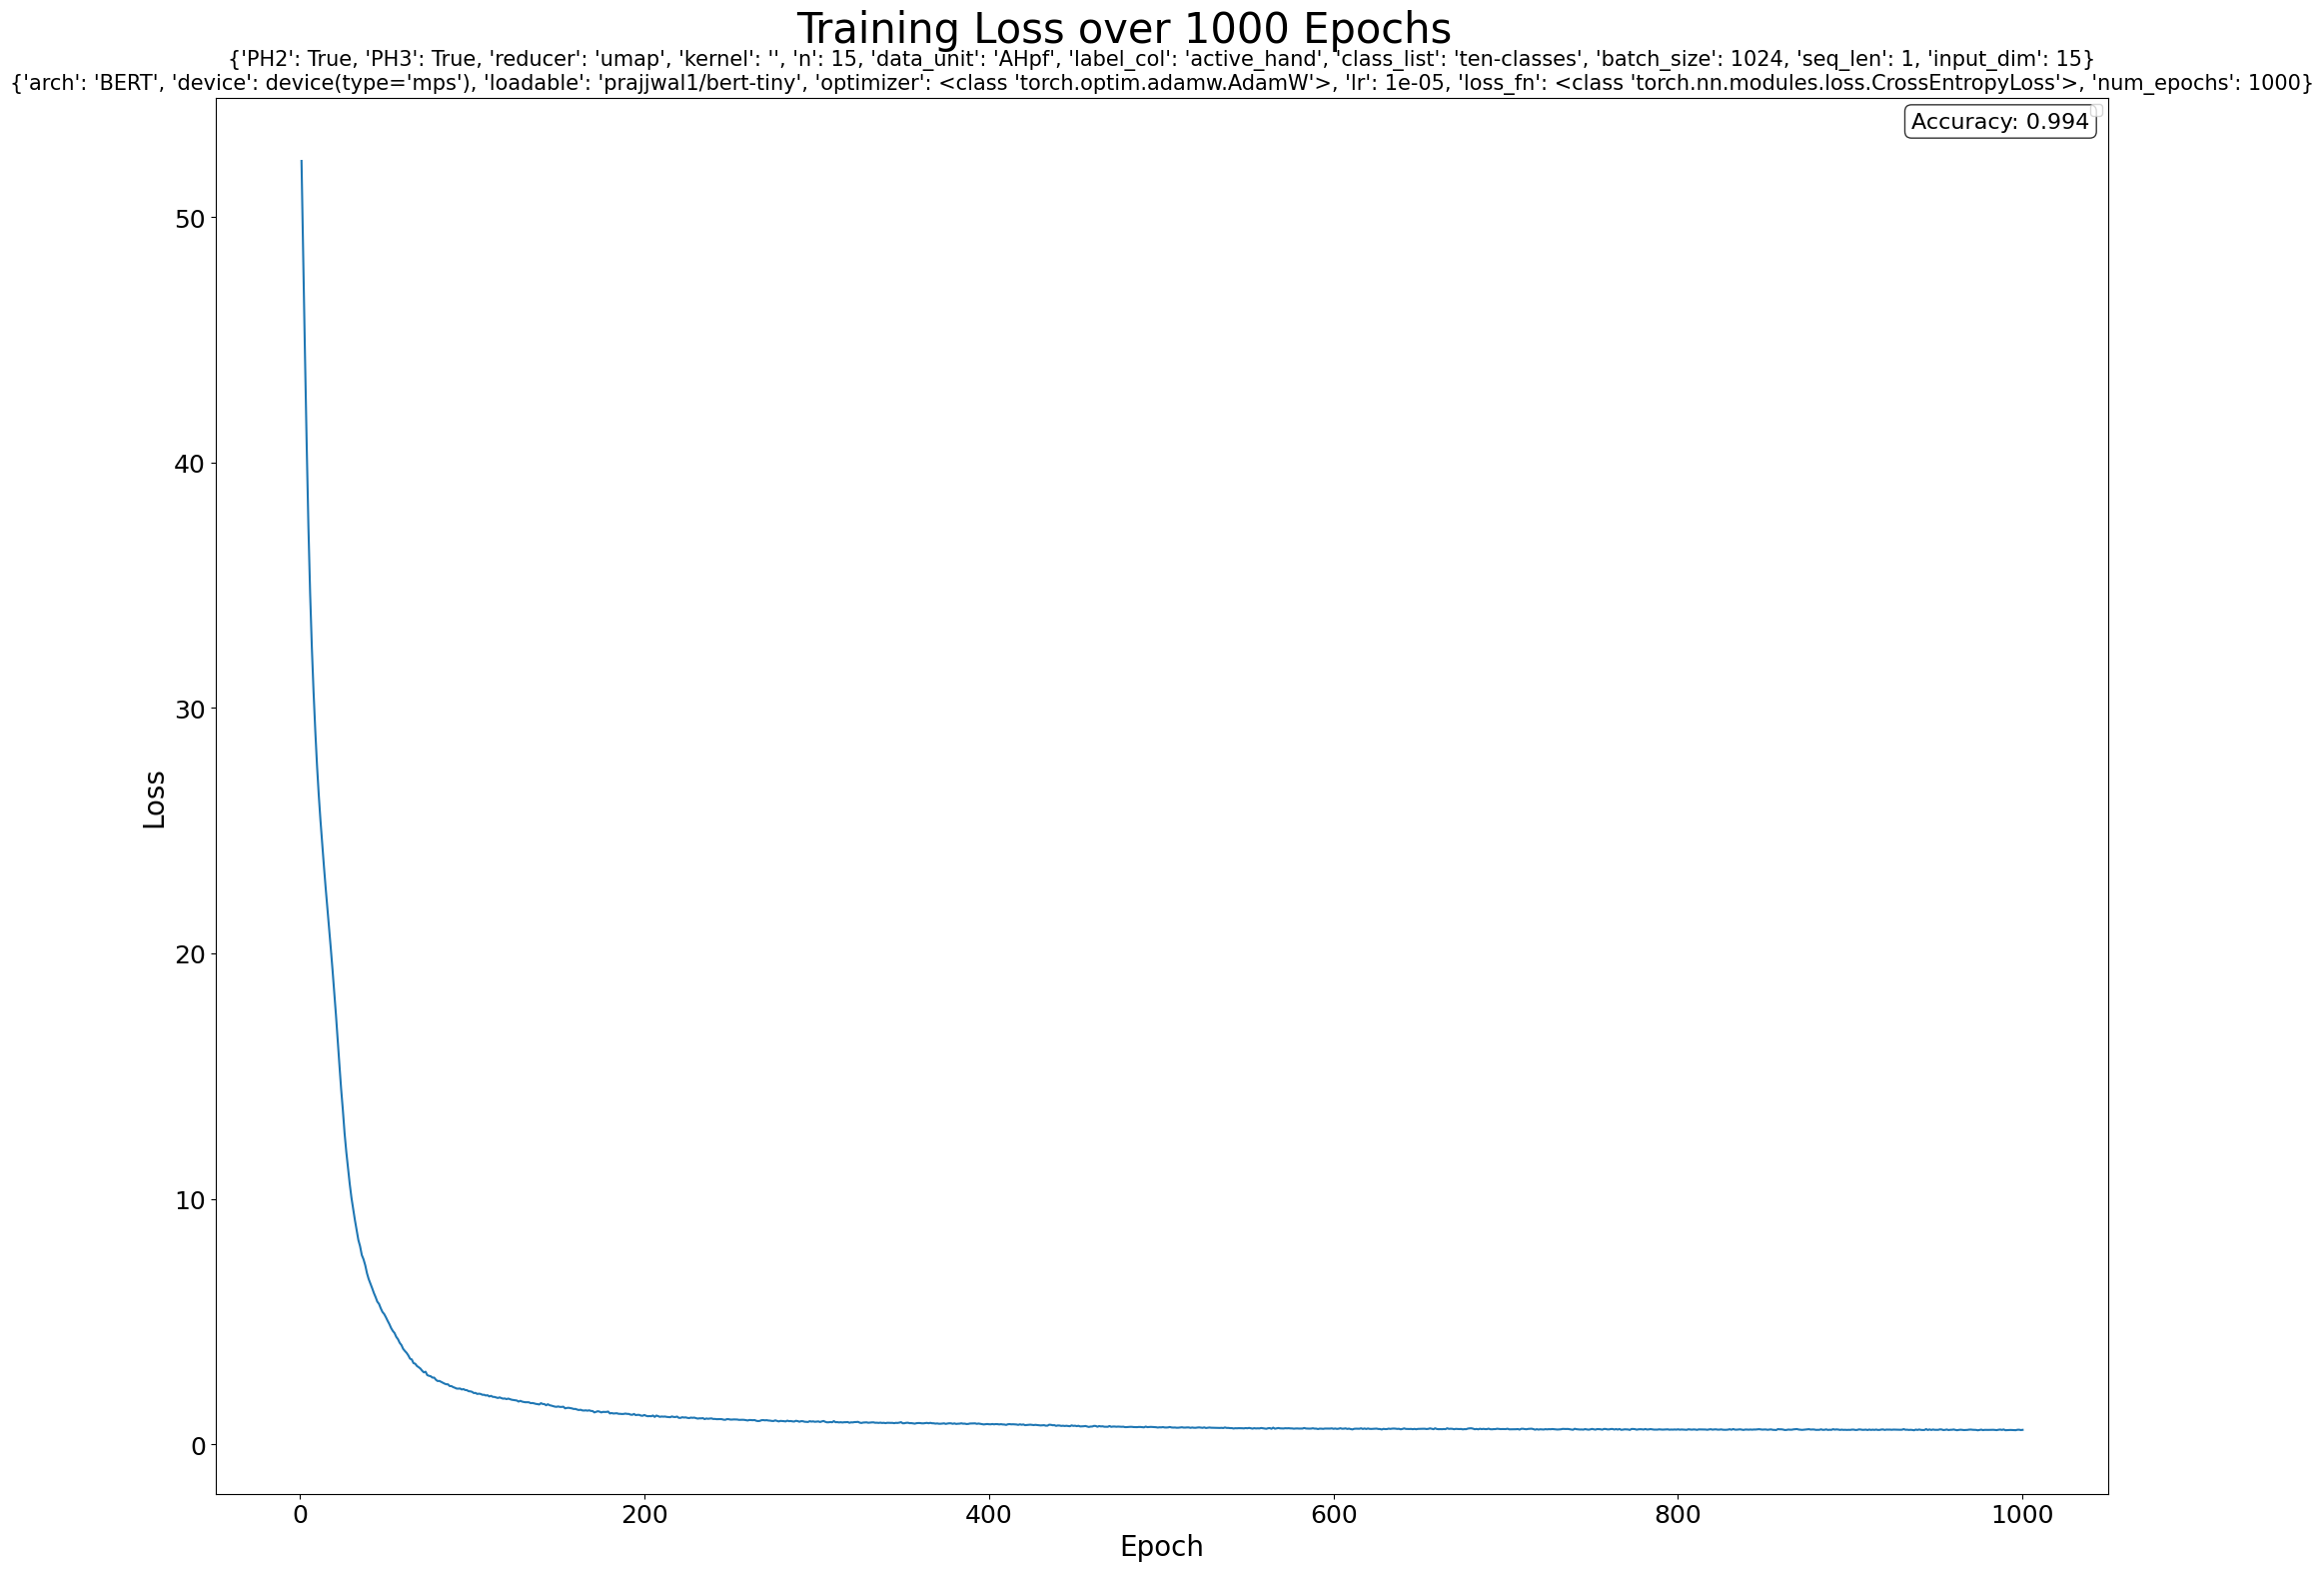

In [7]:
bert.find_best(sup.DATA_AH_PF, sup.active_hand_col, TRAIN_classes, 
                    LOADABLE_CANDIDATES=[exploringBERT], 
                    num_epochs_CANDIDATES=[exploring_num_epochs])

In [8]:
ahpf_bert_scores_df = pd.DataFrame(sup.bert_score_tracker, columns=sup.bert_scores_columns)
now = datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
sup.create_dir_if_not_exists(os.path.join(sup.TRAIN_SCORES_ROOT, TRAIN_classes, 
                                          sup.TRAIN_BERT_CODE,
                                          sup.DATA_AH_PF,
                                          exploringBERT))
ahpf_bert_scores_df.to_csv(os.path.join(sup.TRAIN_SCORES_ROOT, TRAIN_classes, 
                                       sup.TRAIN_BERT_CODE,
                                       sup.DATA_AH_PF,
                                       exploringBERT, 
                                       f"{now}.csv"), index=False)

Directory /Users/diego/Desktop/iteso/TOG/scores/ten-classes/BERT/AHpf/prajjwal1/bert-tiny does not exist. Creating it and continuing with execution


## Sign prediction

### Spf

In [9]:
sup.bert_score_tracker = []

updating best... 0.24891002774474832
	{'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 3, 'data_unit': 'Spf', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 3}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.4351961950059453
	{'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 7, 'data_unit': 'Spf', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 7}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.4700753071739992
	{'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 11, 'data_unit': 'Spf', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 11}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.49544193420531113
	{'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 15, 'data_unit': 'Spf', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 15}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.8026159334126041
	{'PH2': True, 'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'data_unit': 'Spf', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 87}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.9342053111375347
	{'PH2': False, 'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'data_unit': 'Spf', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 72}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
Data Unit: Spf
Best score: 0.9342053111375347
Best data config: {'PH2': False, 'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'data_unit': 'Spf', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 1, 'input_dim': 72}
Best train config:

/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


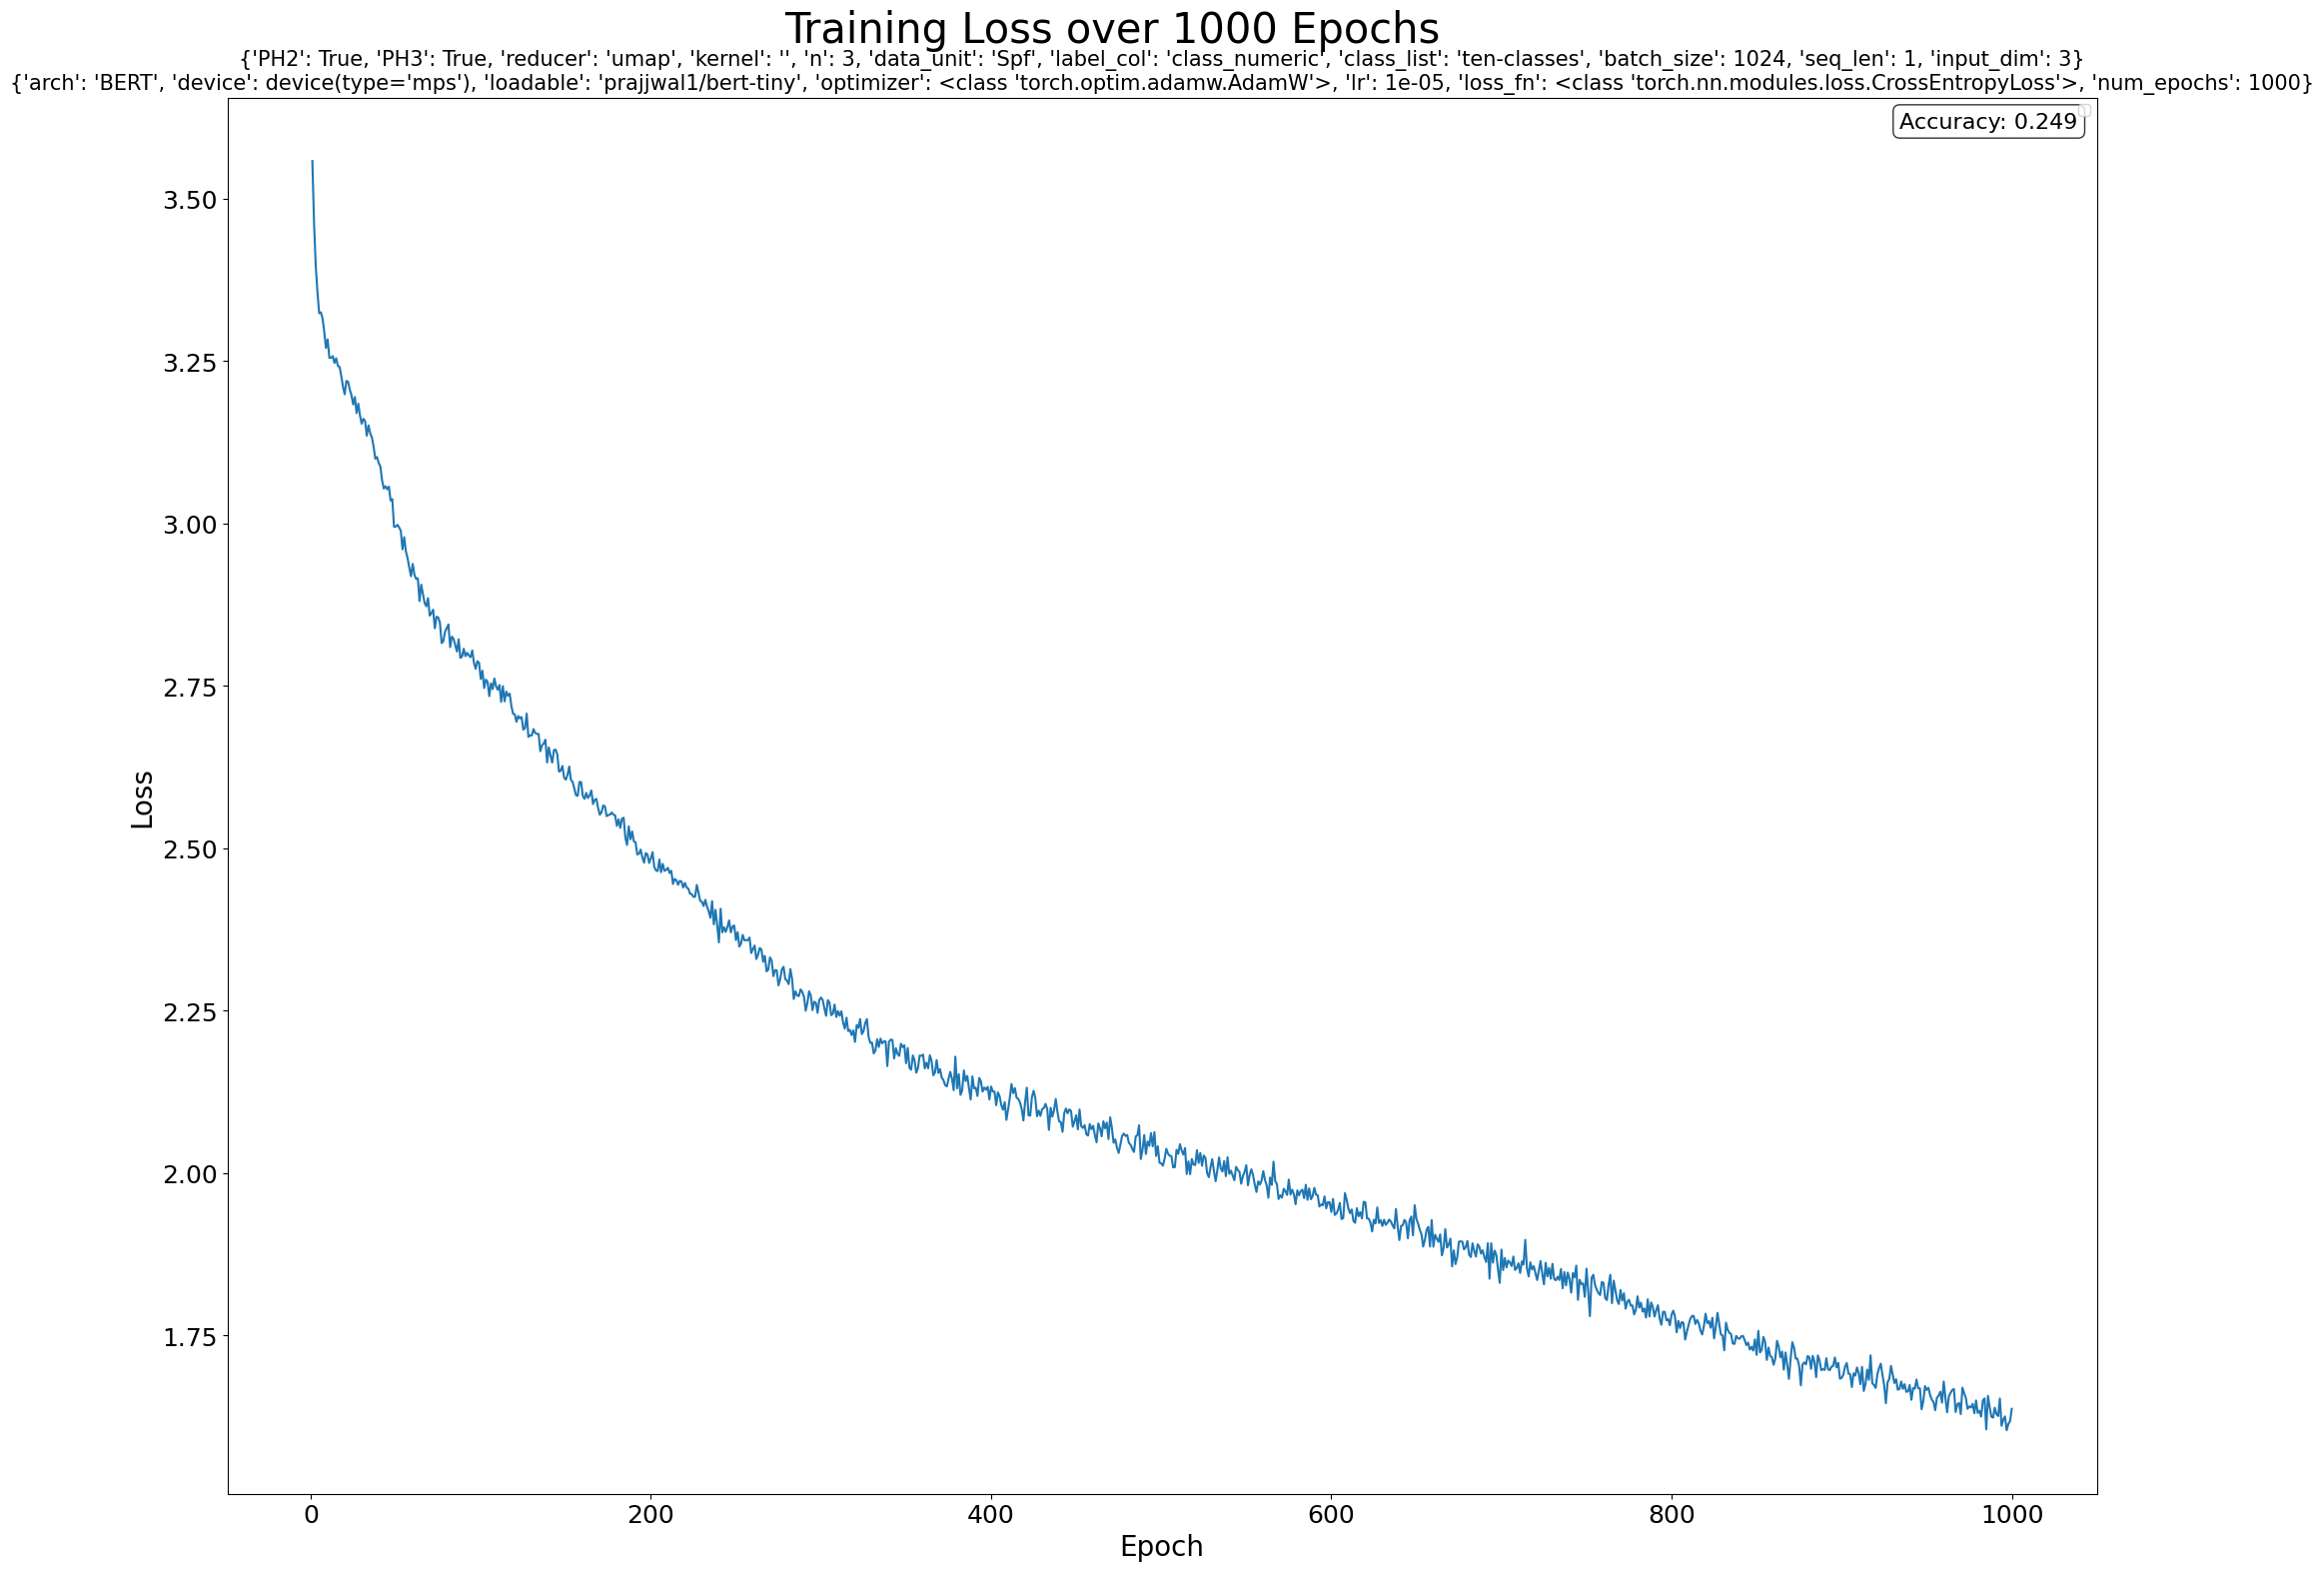

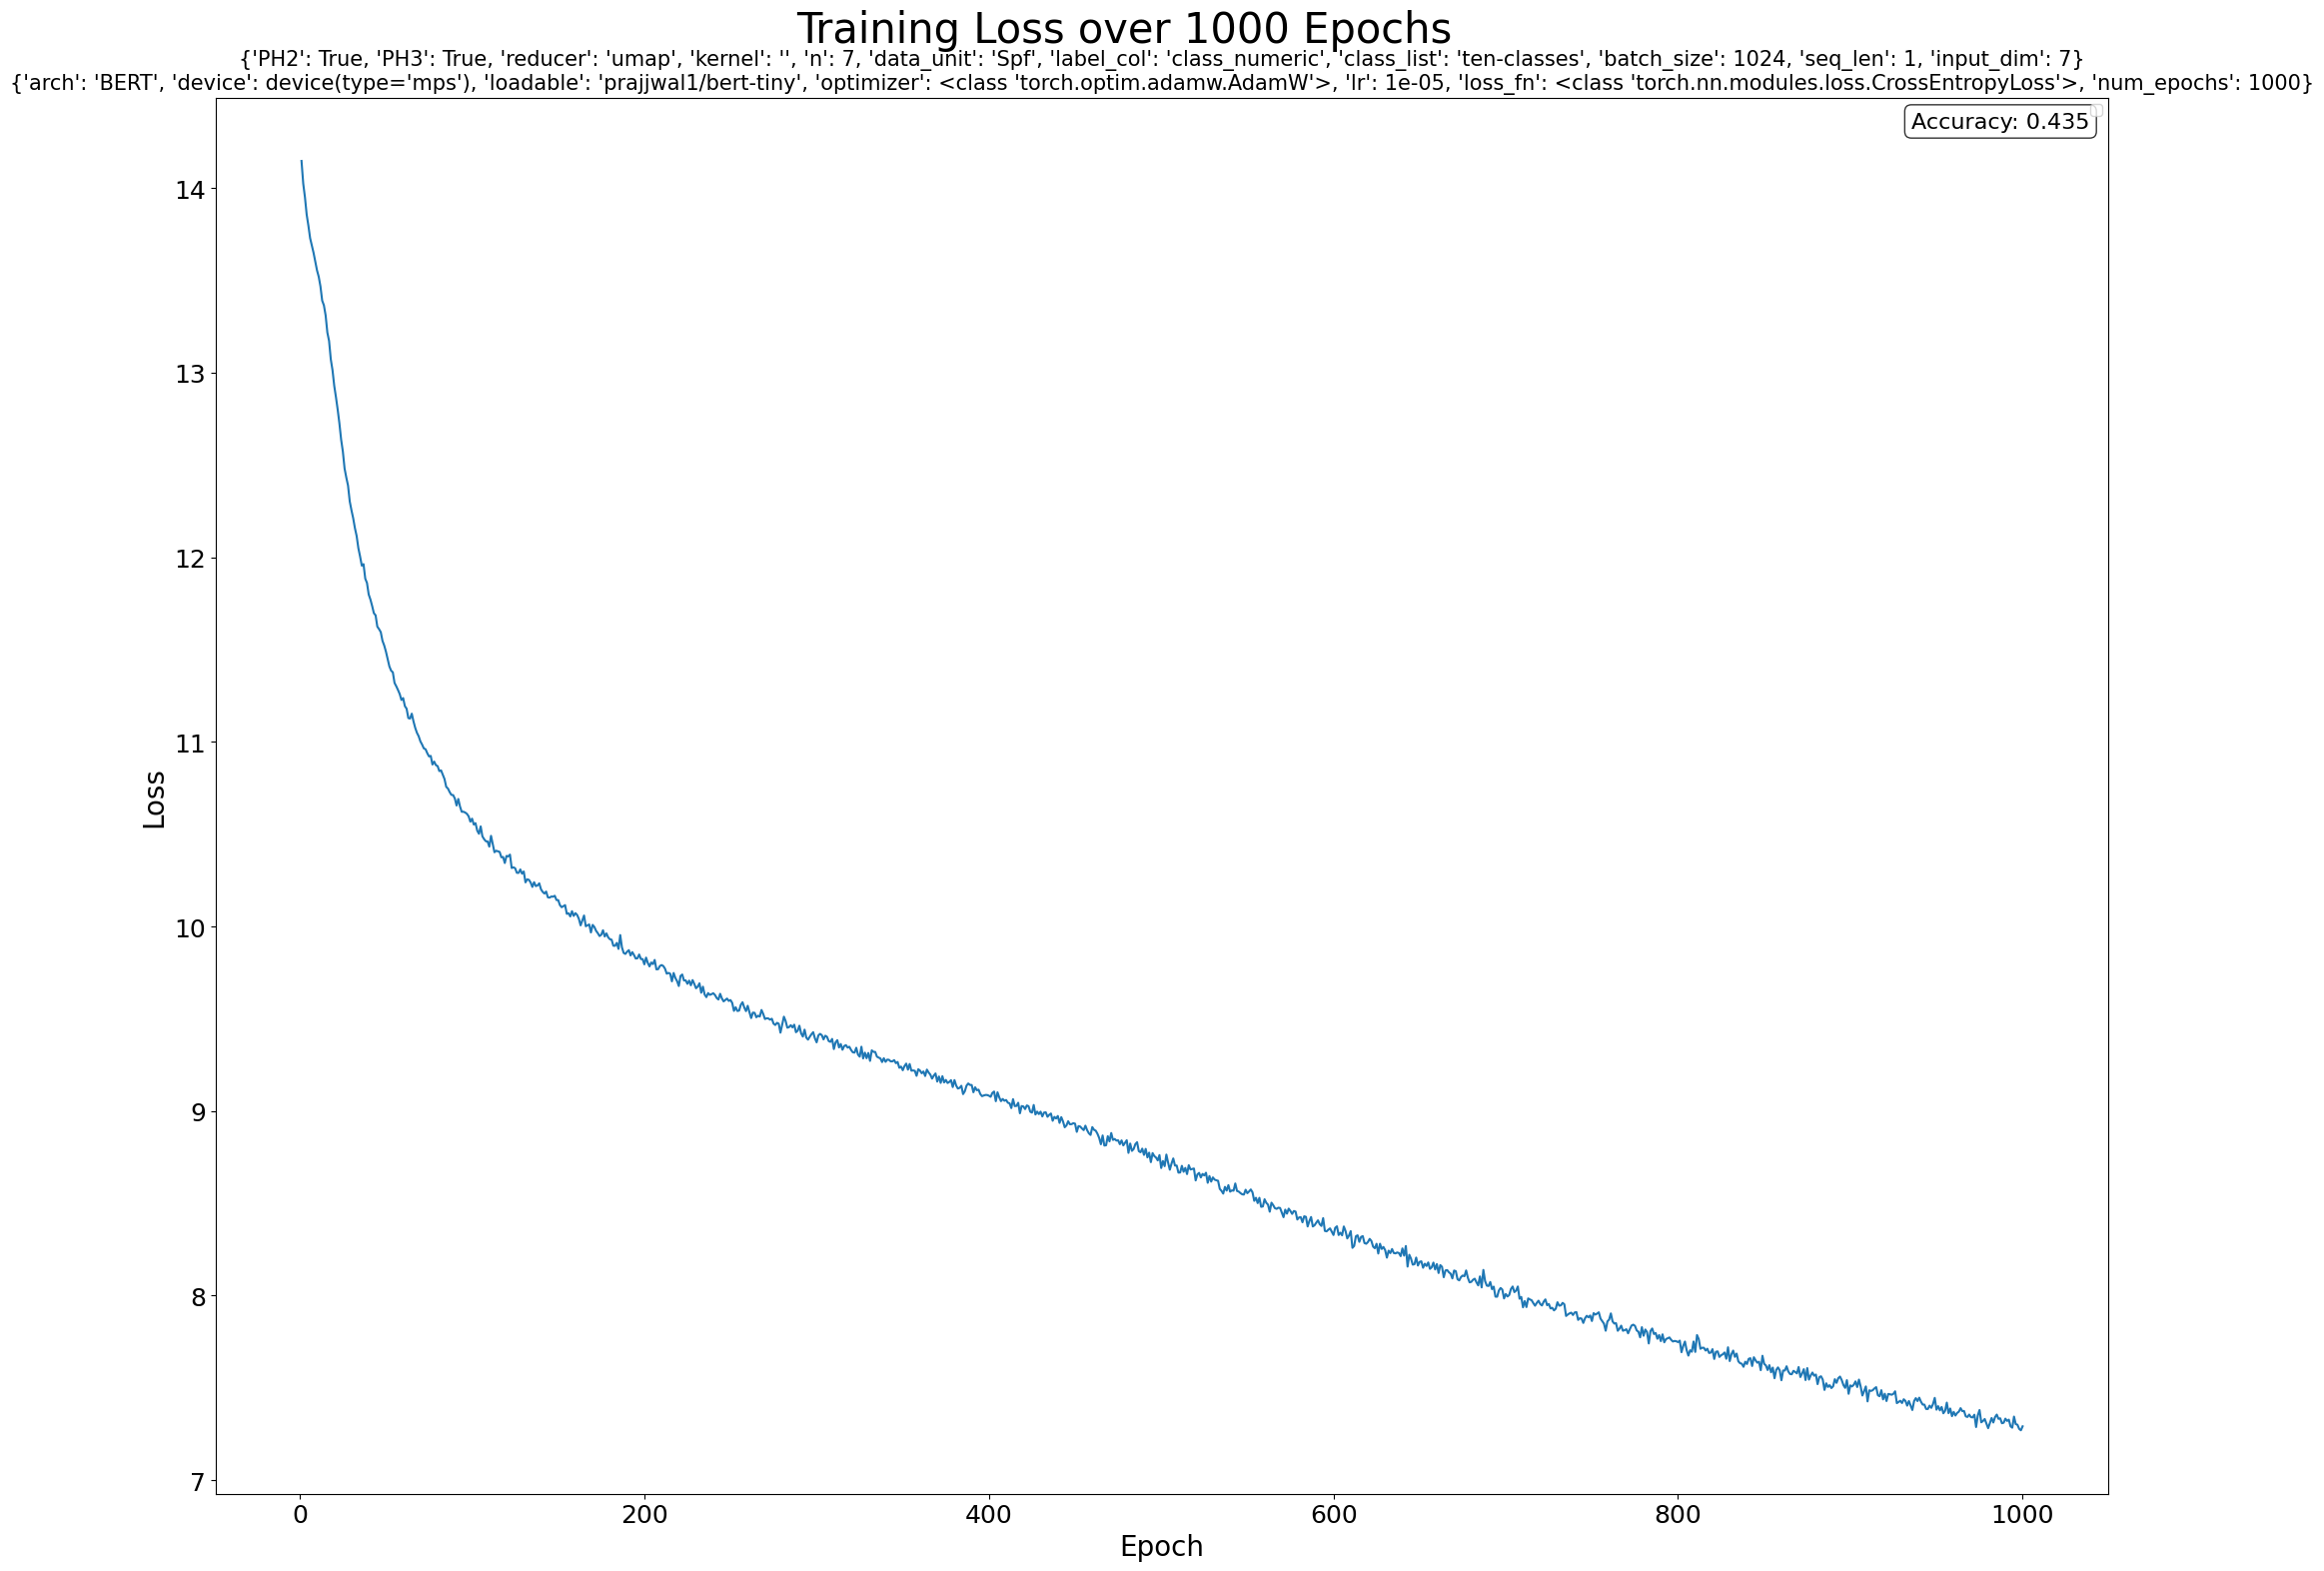

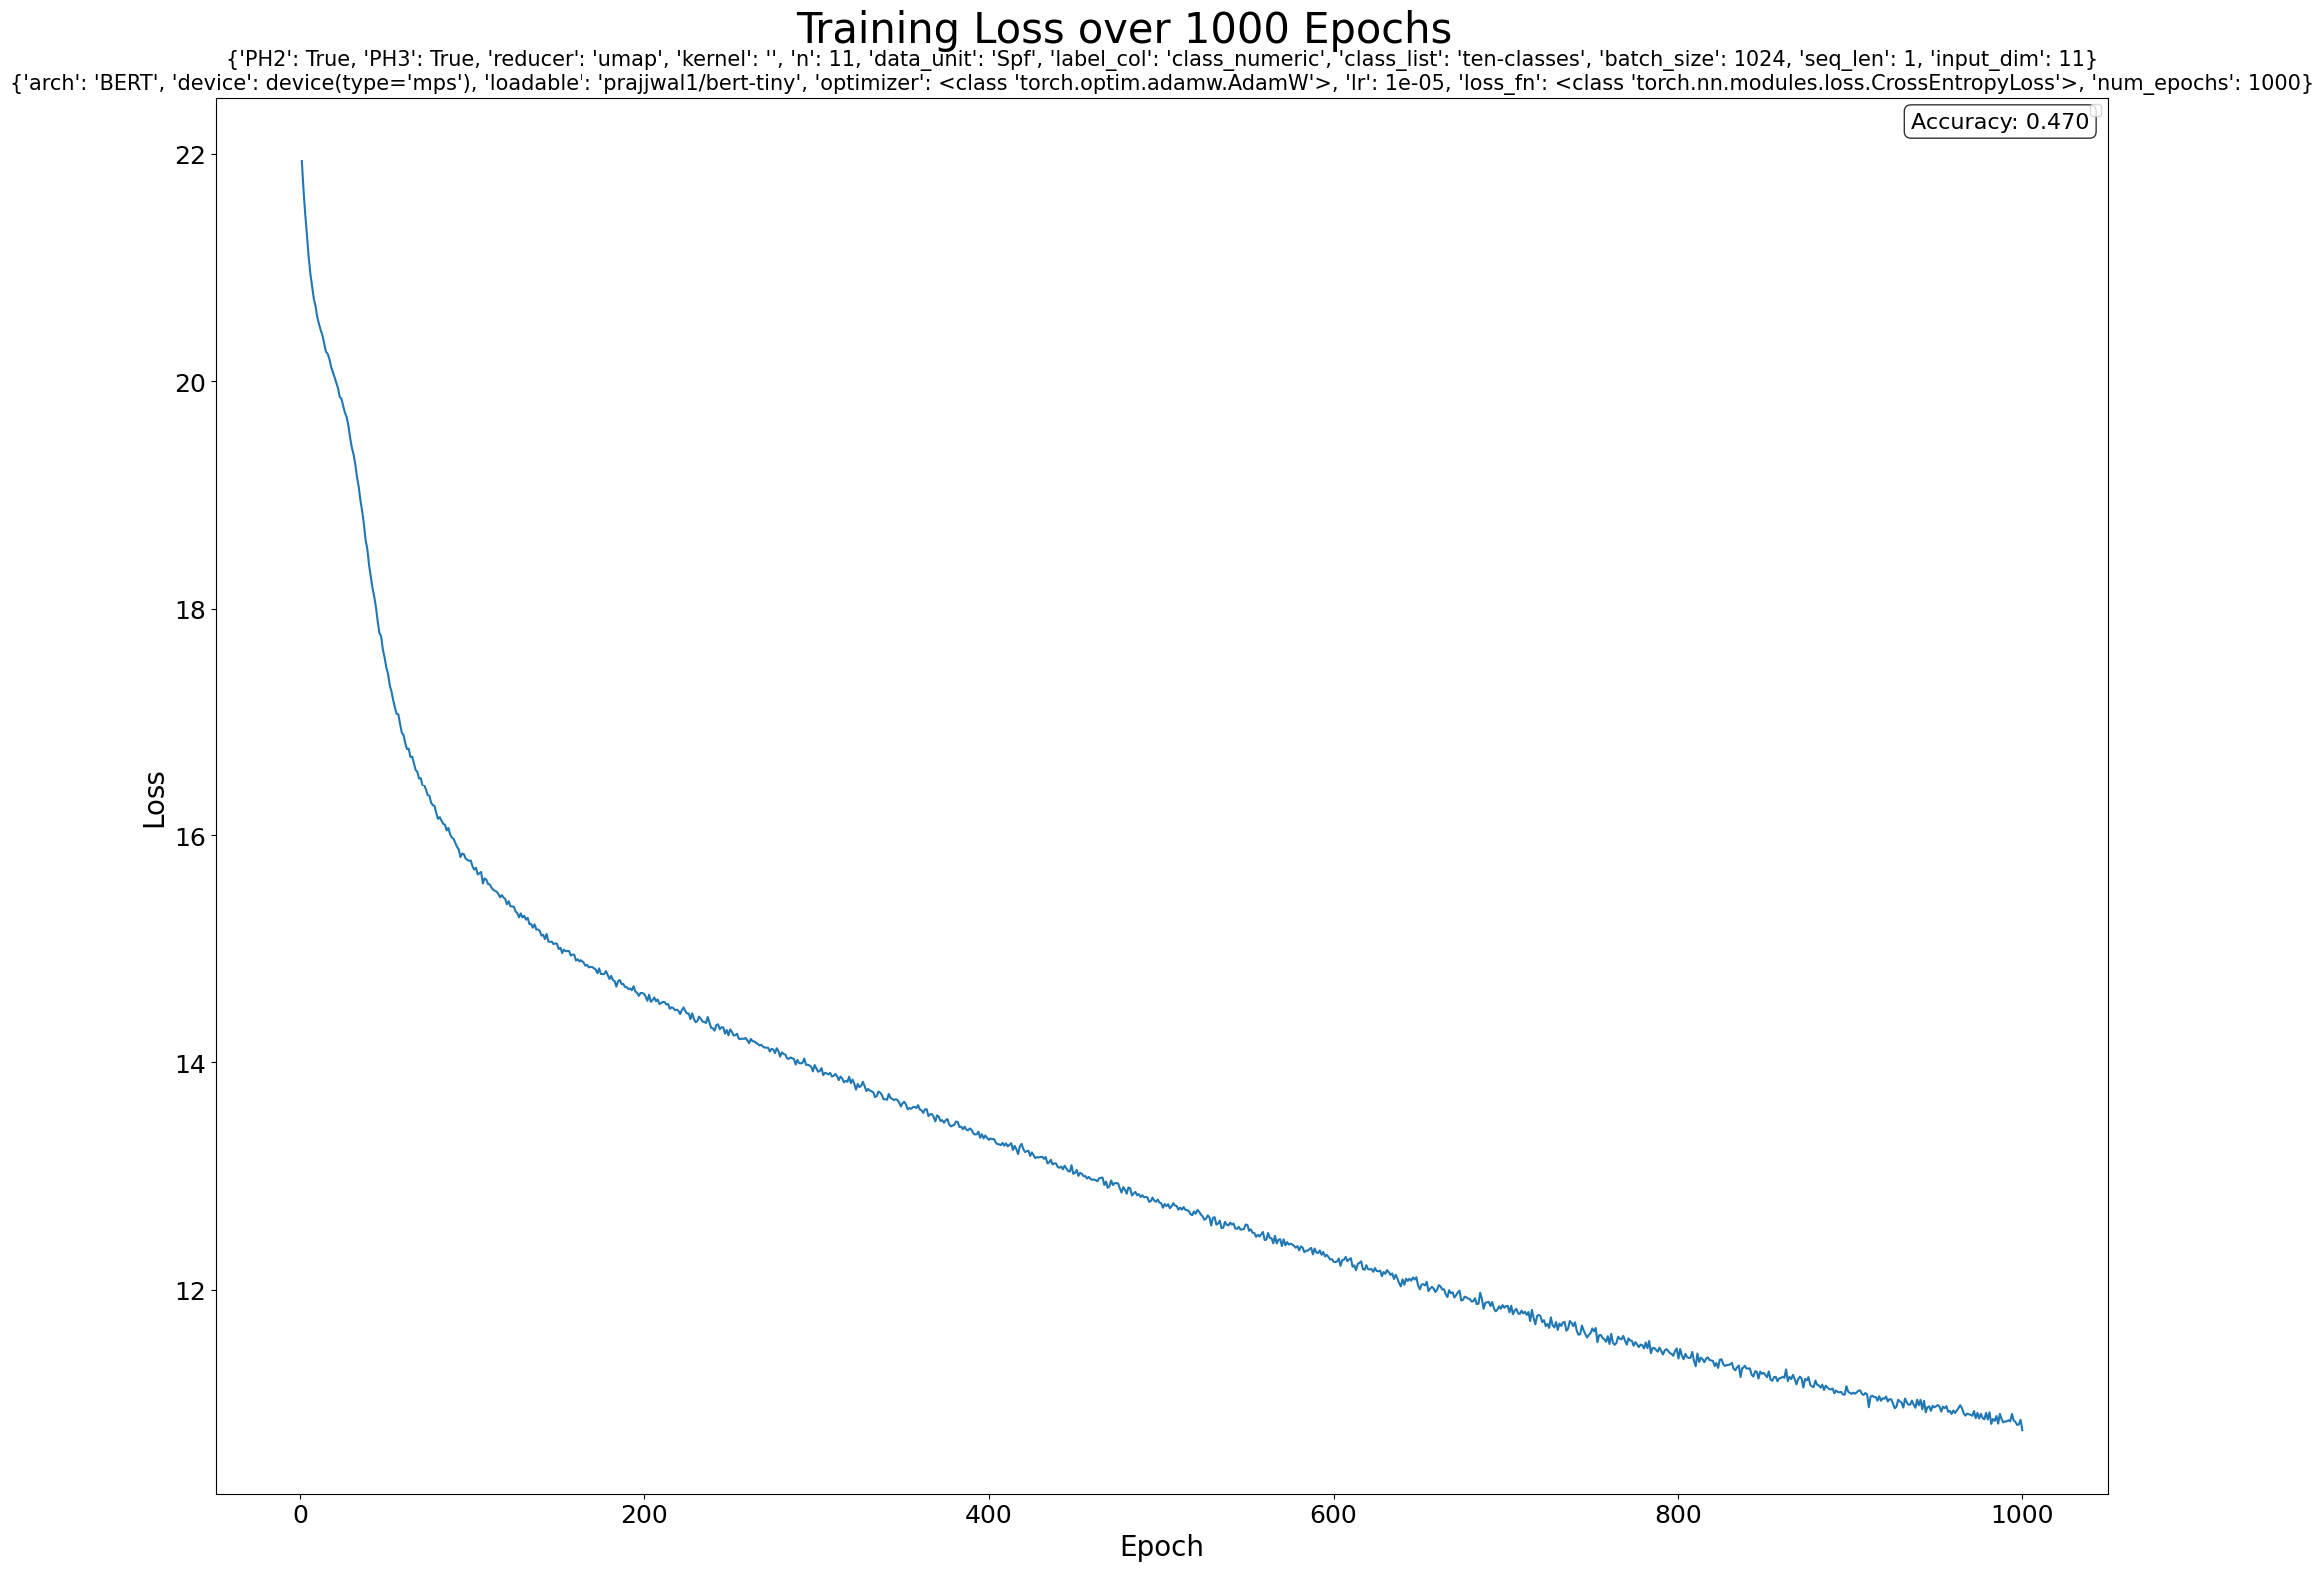

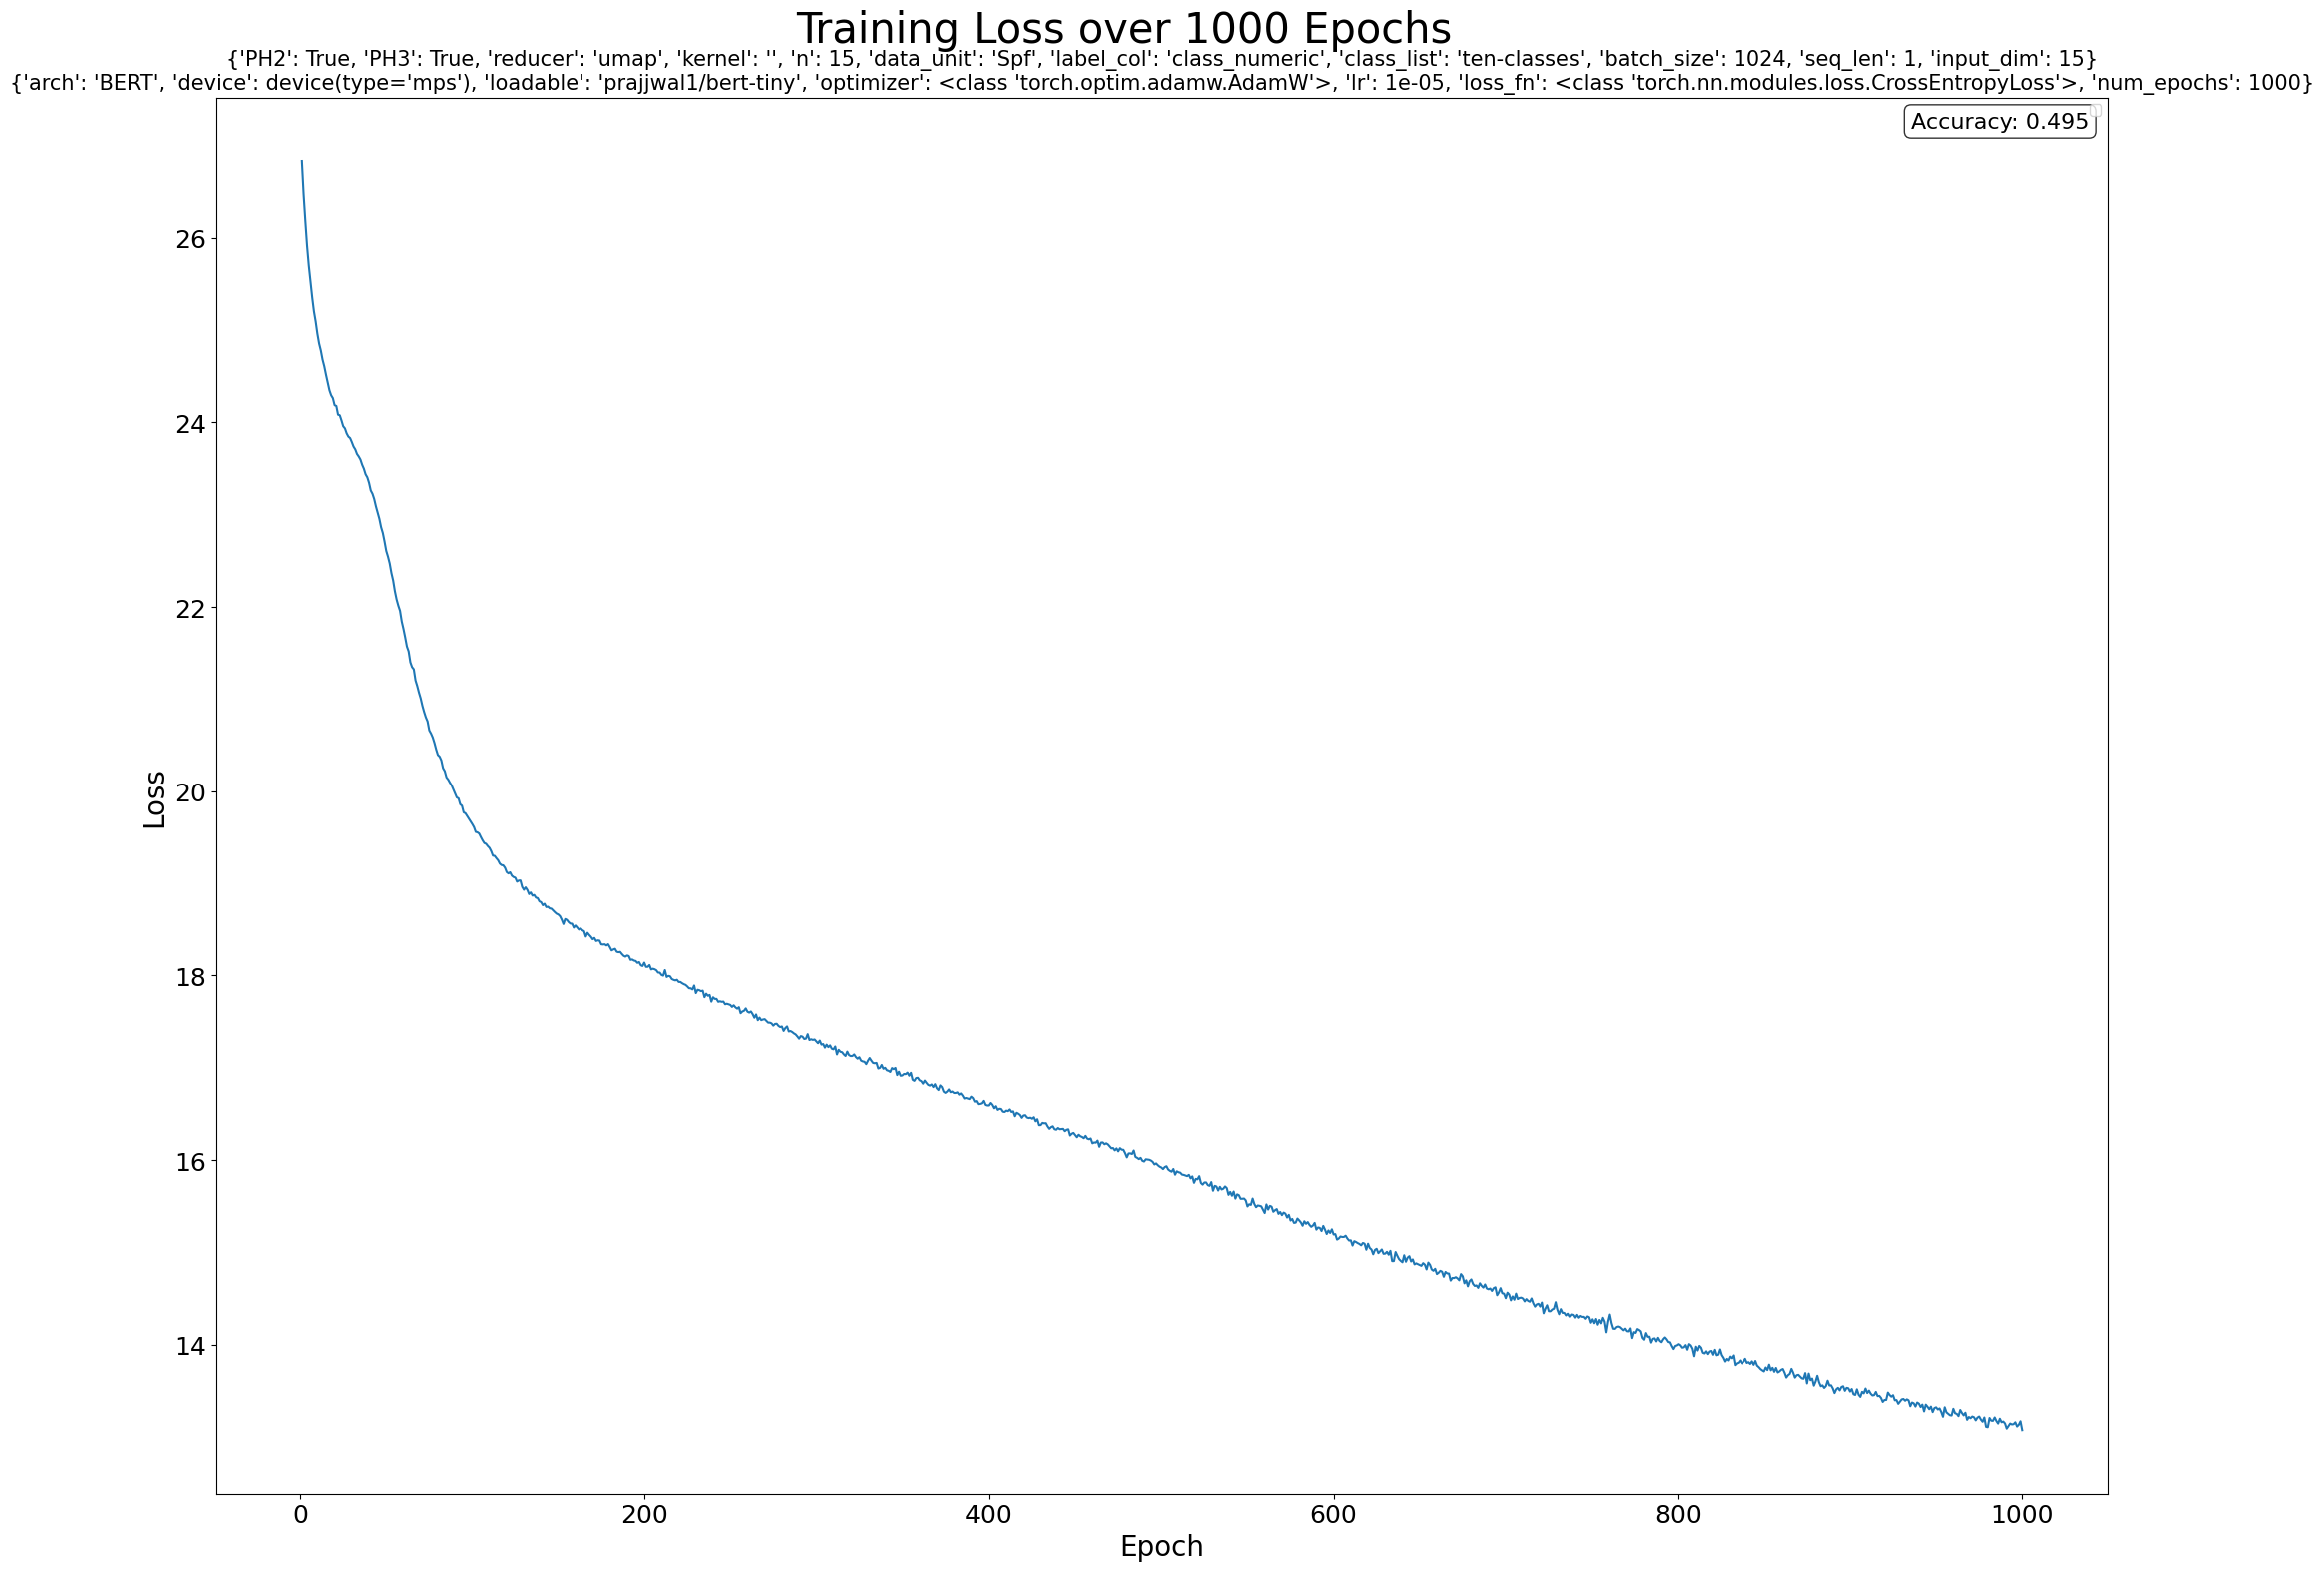

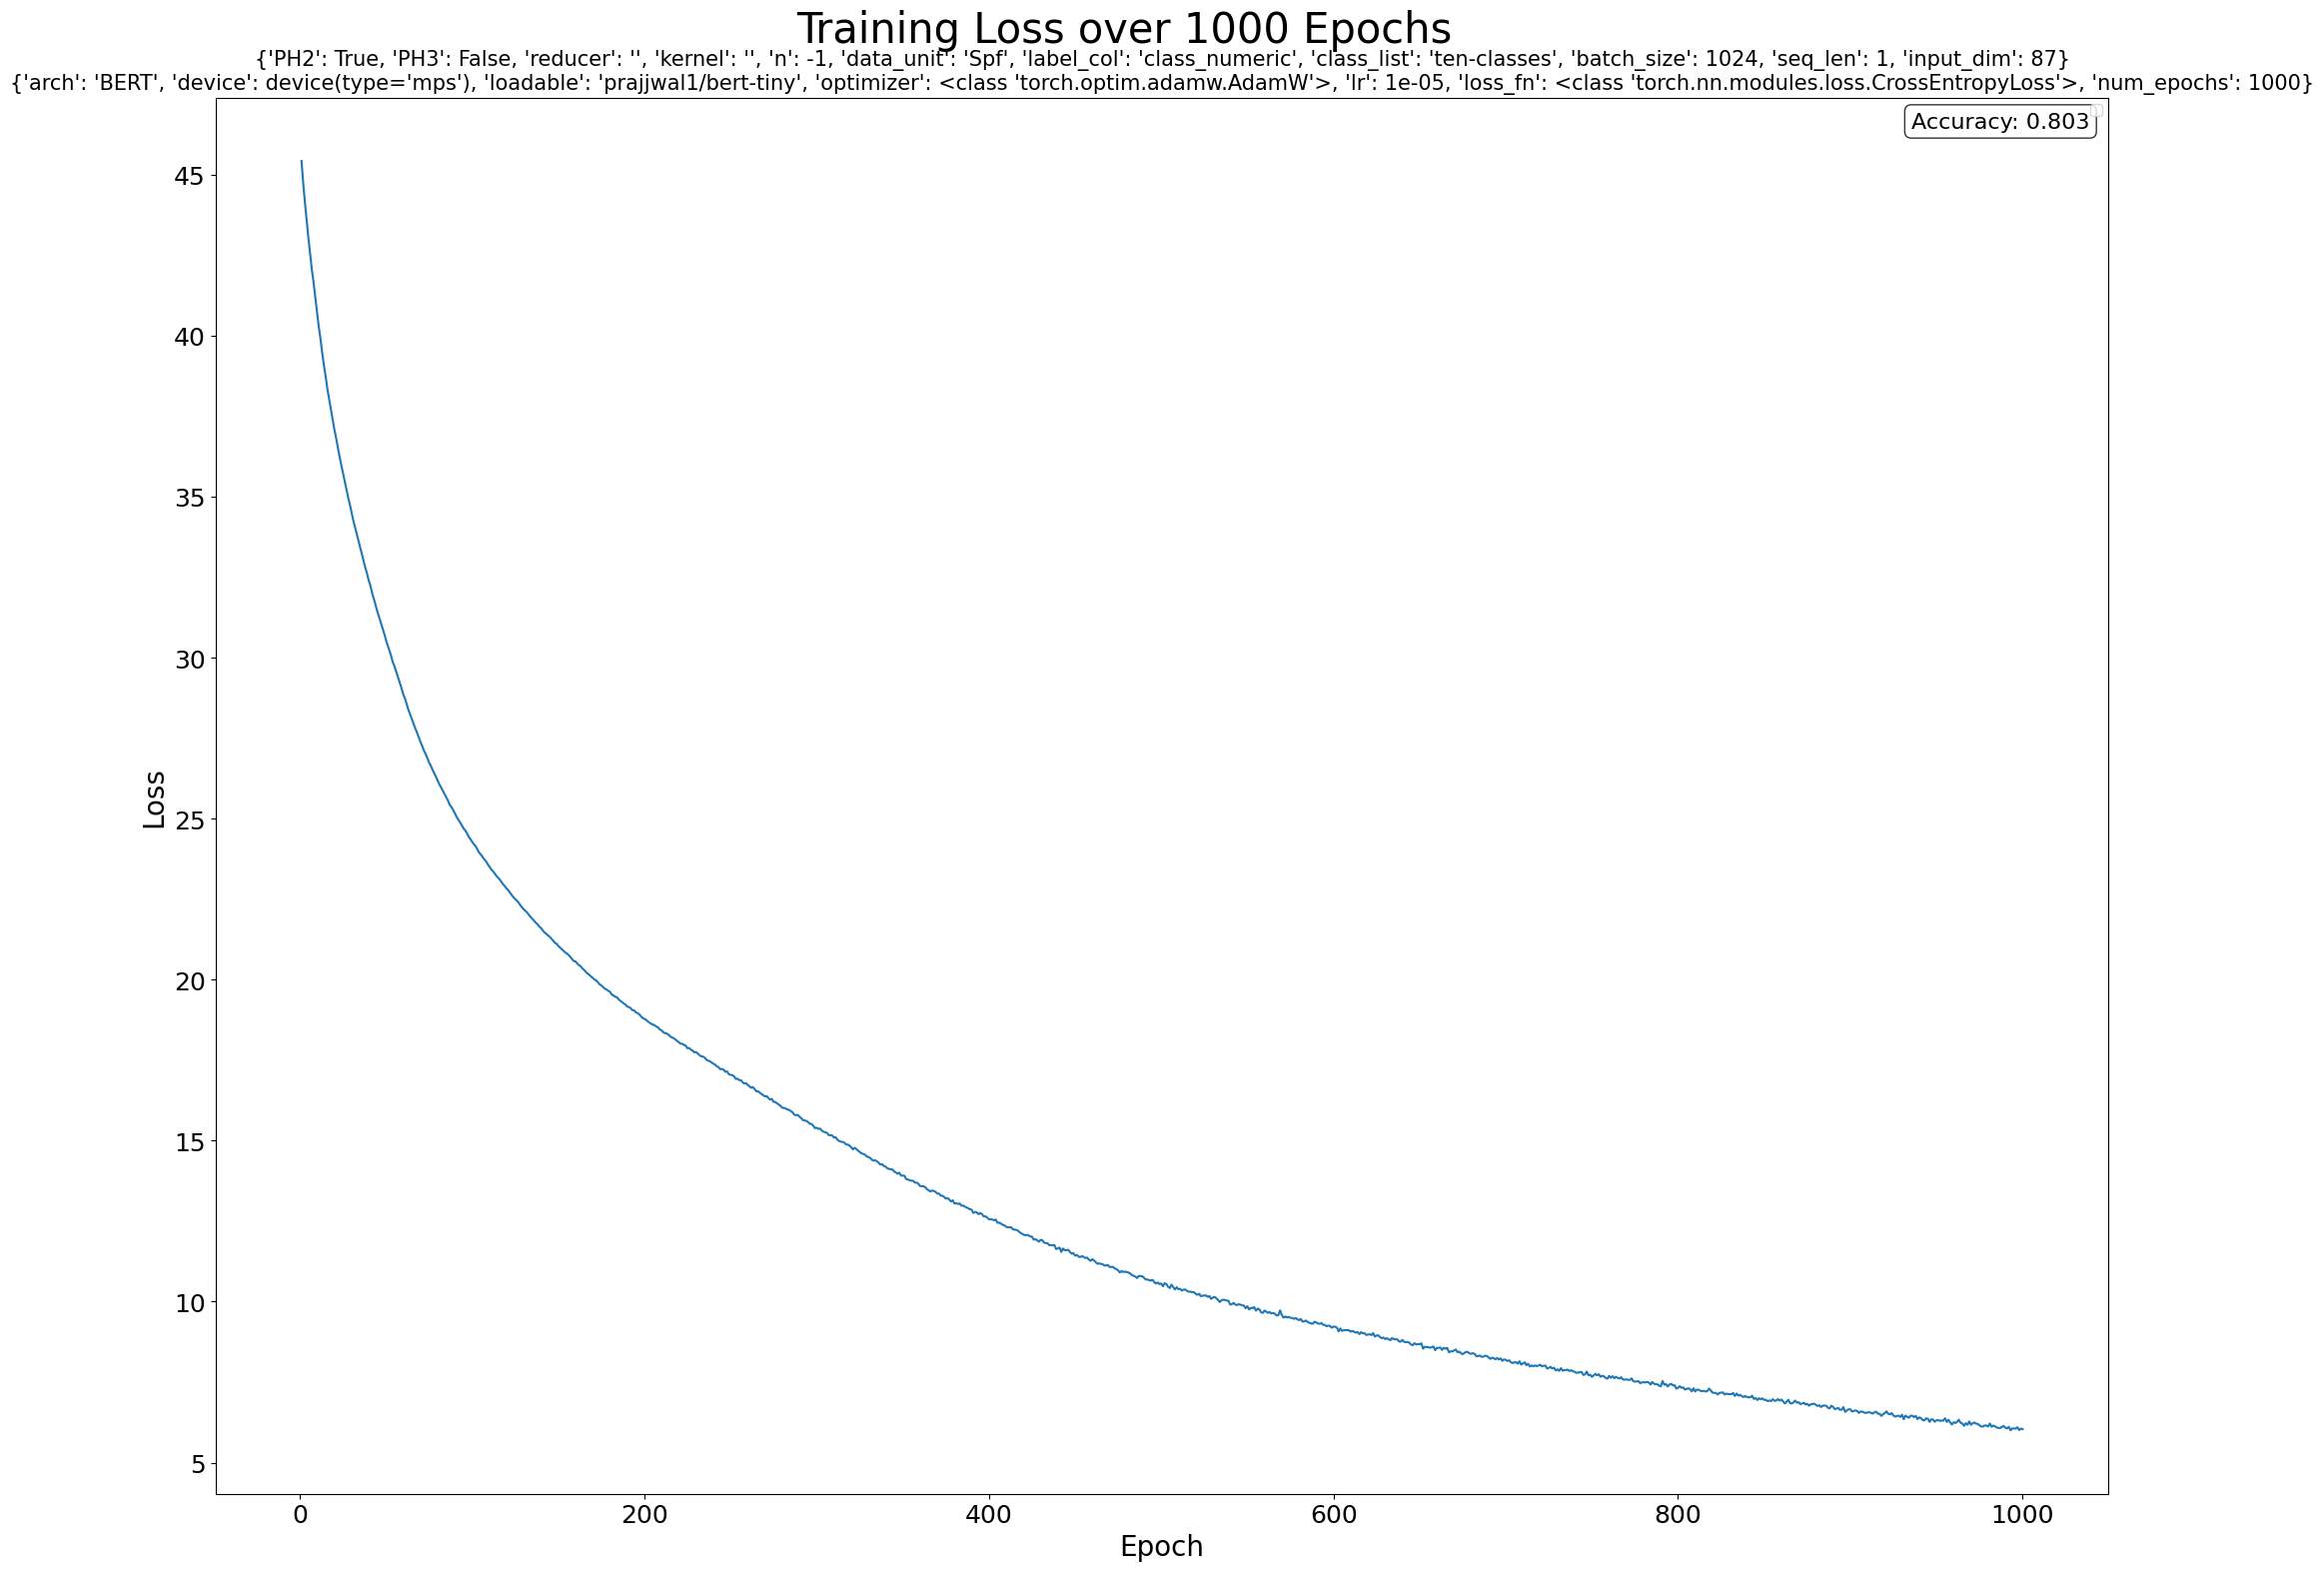

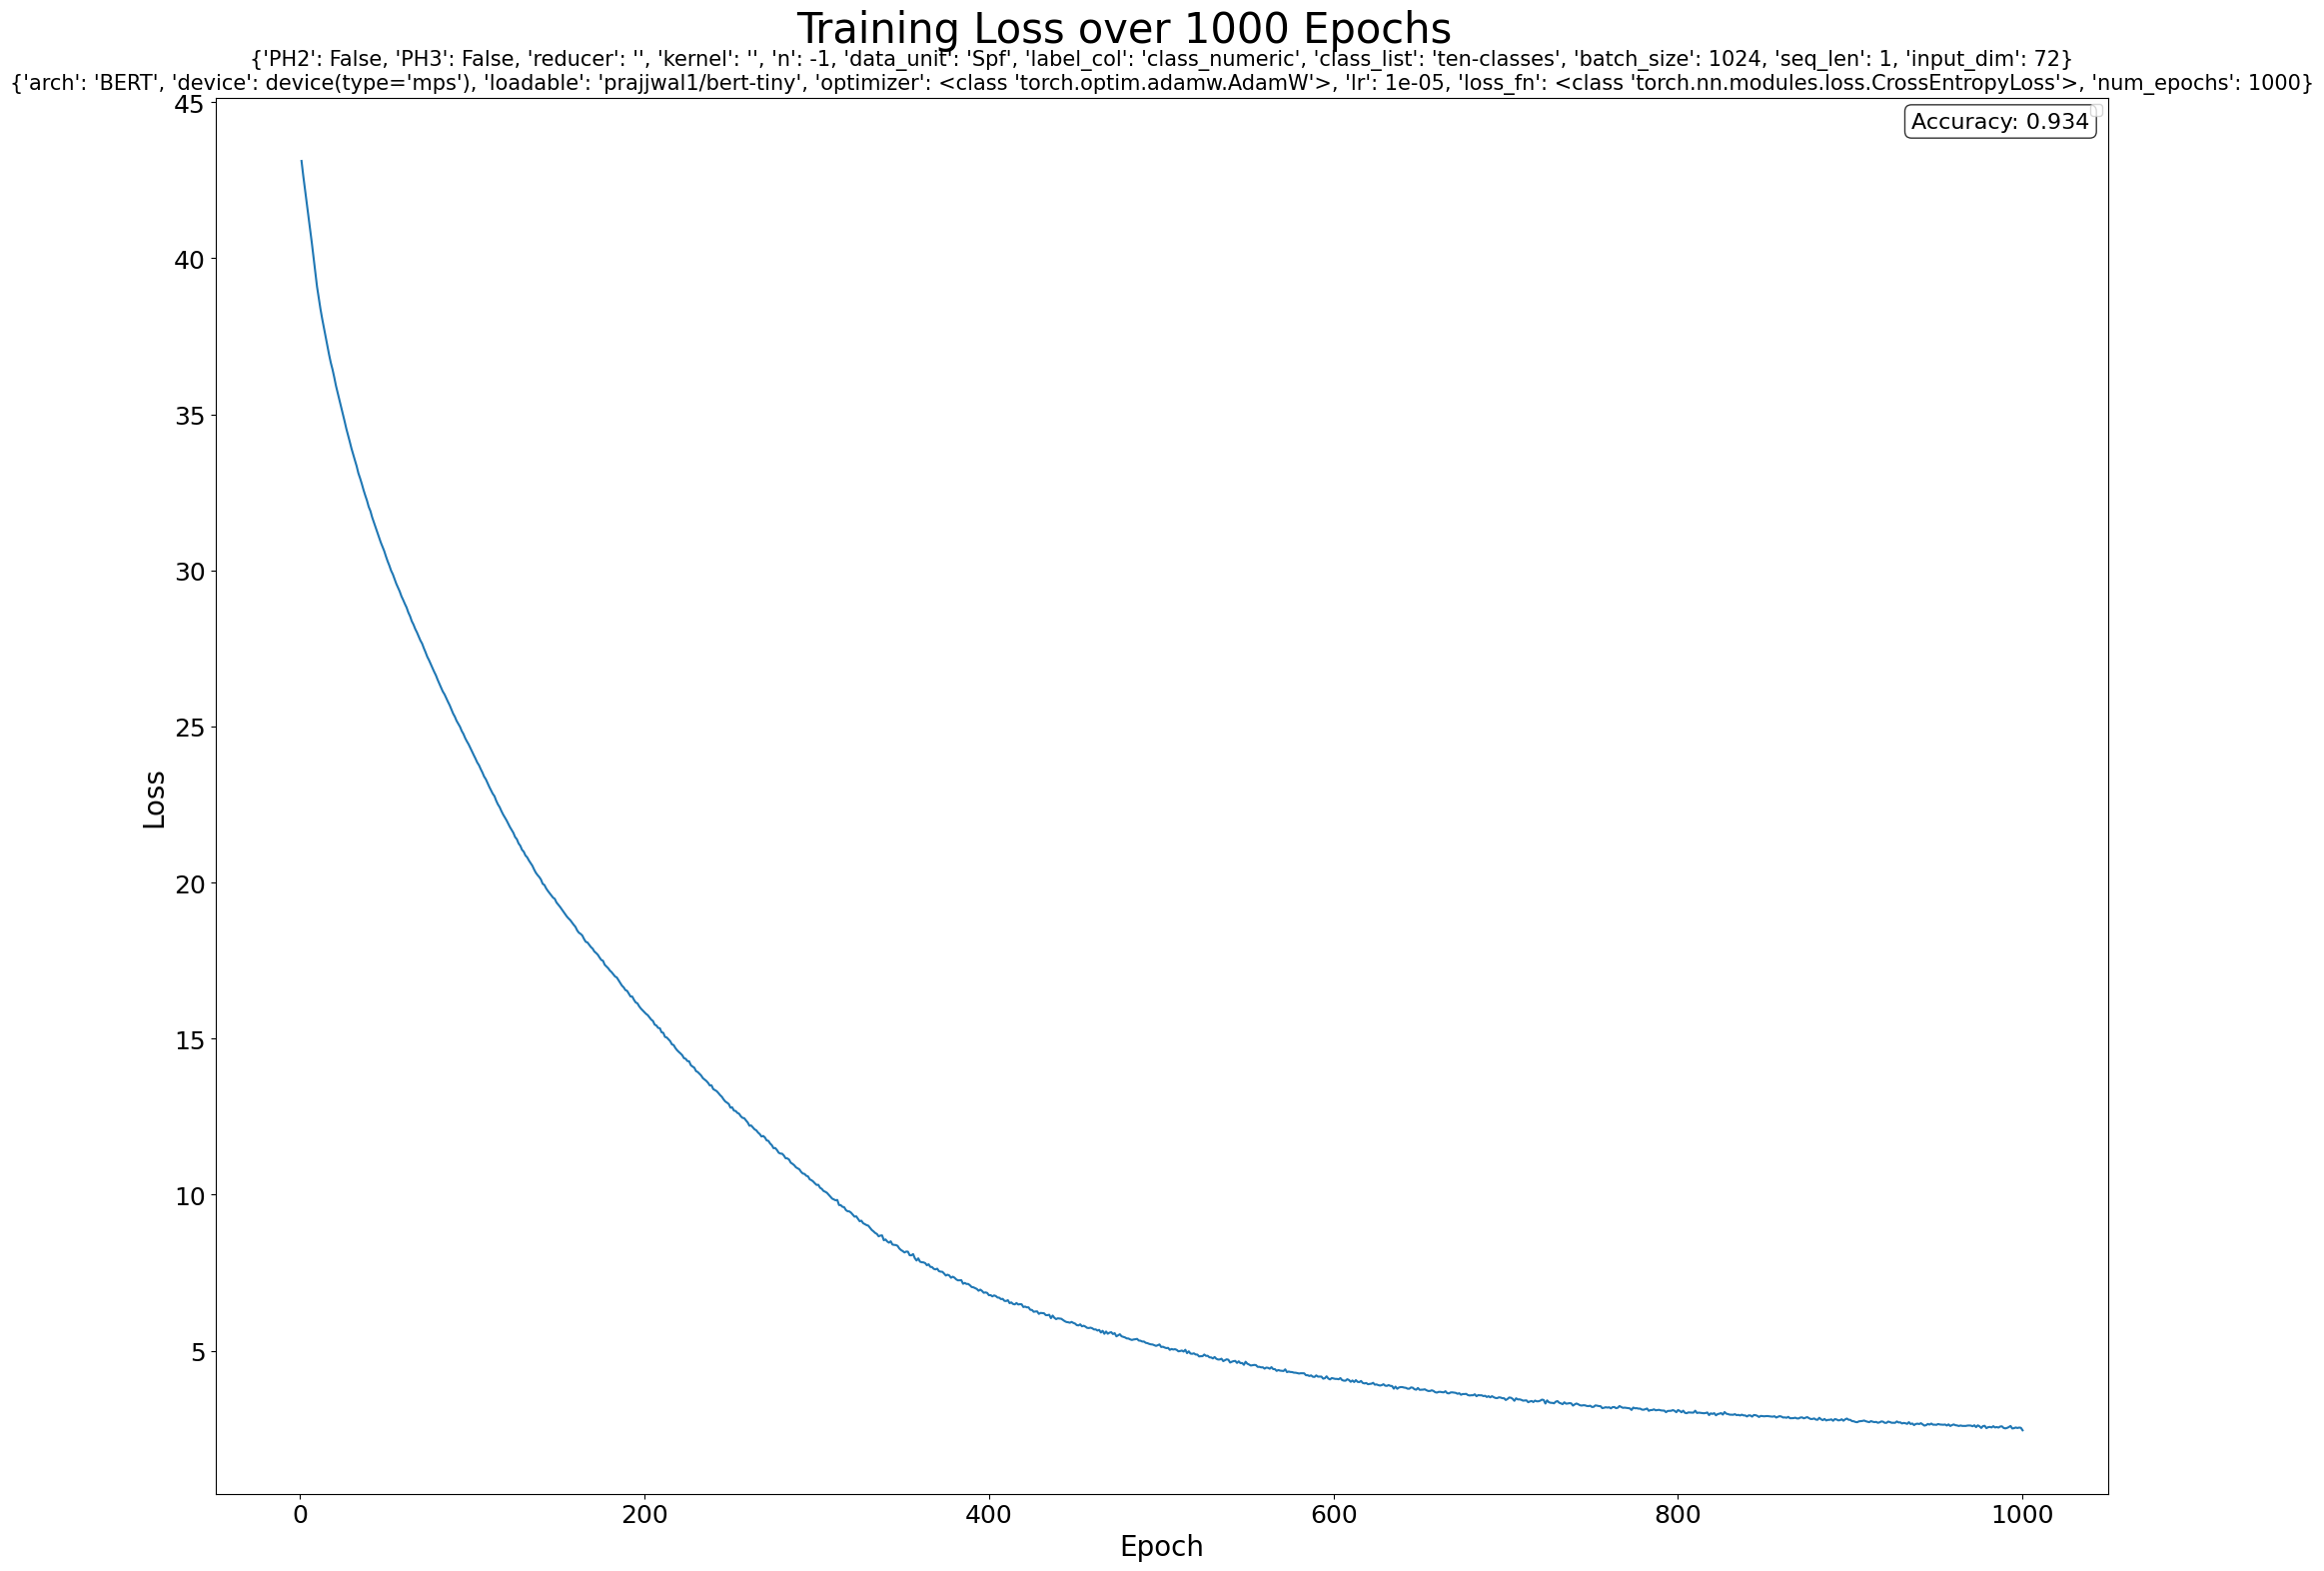

In [10]:
bert.find_best(sup.DATA_S_PF, sup.class_numeric_column, TRAIN_classes, 
                    LOADABLE_CANDIDATES=[exploringBERT], 
                    num_epochs_CANDIDATES=[exploring_num_epochs])

In [11]:
spf_bert_scores_df = pd.DataFrame(sup.bert_score_tracker, columns=sup.bert_scores_columns)
now = datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
sup.create_dir_if_not_exists(os.path.join(sup.TRAIN_SCORES_ROOT, TRAIN_classes, 
                                          sup.TRAIN_BERT_CODE,
                                          sup.DATA_S_PF,
                                          exploringBERT))
spf_bert_scores_df.to_csv(os.path.join(sup.TRAIN_SCORES_ROOT, TRAIN_classes, 
                                       sup.TRAIN_BERT_CODE,
                                       sup.DATA_S_PF,
                                       exploringBERT, 
                                       f"{now}.csv"), index=False)

Directory /Users/diego/Desktop/iteso/TOG/scores/ten-classes/BERT/Spf/prajjwal1/bert-tiny does not exist. Creating it and continuing with execution


### Spv

In [12]:
sup.bert_score_tracker = []

updating best... 0.2037914691943128
	{'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 3, 'data_unit': 'Spv', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 12, 'input_dim': 3}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.26066350710900477
	{'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 7, 'data_unit': 'Spv', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 12, 'input_dim': 7}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.27014218009478674
	{'PH2': True, 'PH3': True, 'reducer': 'umap', 'kernel': '', 'n': 11, 'data_unit': 'Spv', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 12, 'input_dim': 11}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.32701421800947866
	{'PH2': True, 'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'data_unit': 'Spv', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 12, 'input_dim': 87}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


updating best... 0.4928909952606635
	{'PH2': False, 'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'data_unit': 'Spv', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 12, 'input_dim': 72}
	{'arch': 'BERT', 'device': device(type='mps'), 'loadable': 'prajjwal1/bert-tiny', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 1000}
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/ten-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/ten-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Data Unit: Spv
Best score: 0.4928909952606635
Best data config: {'PH2': False, 'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'data_unit': 'Spv', 'label_col': 'class_numeric', 'class_list': 'ten-classes', 'batch_size': 1024, 'seq_len': 12, 'input_dim': 72}
Best train confi

/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


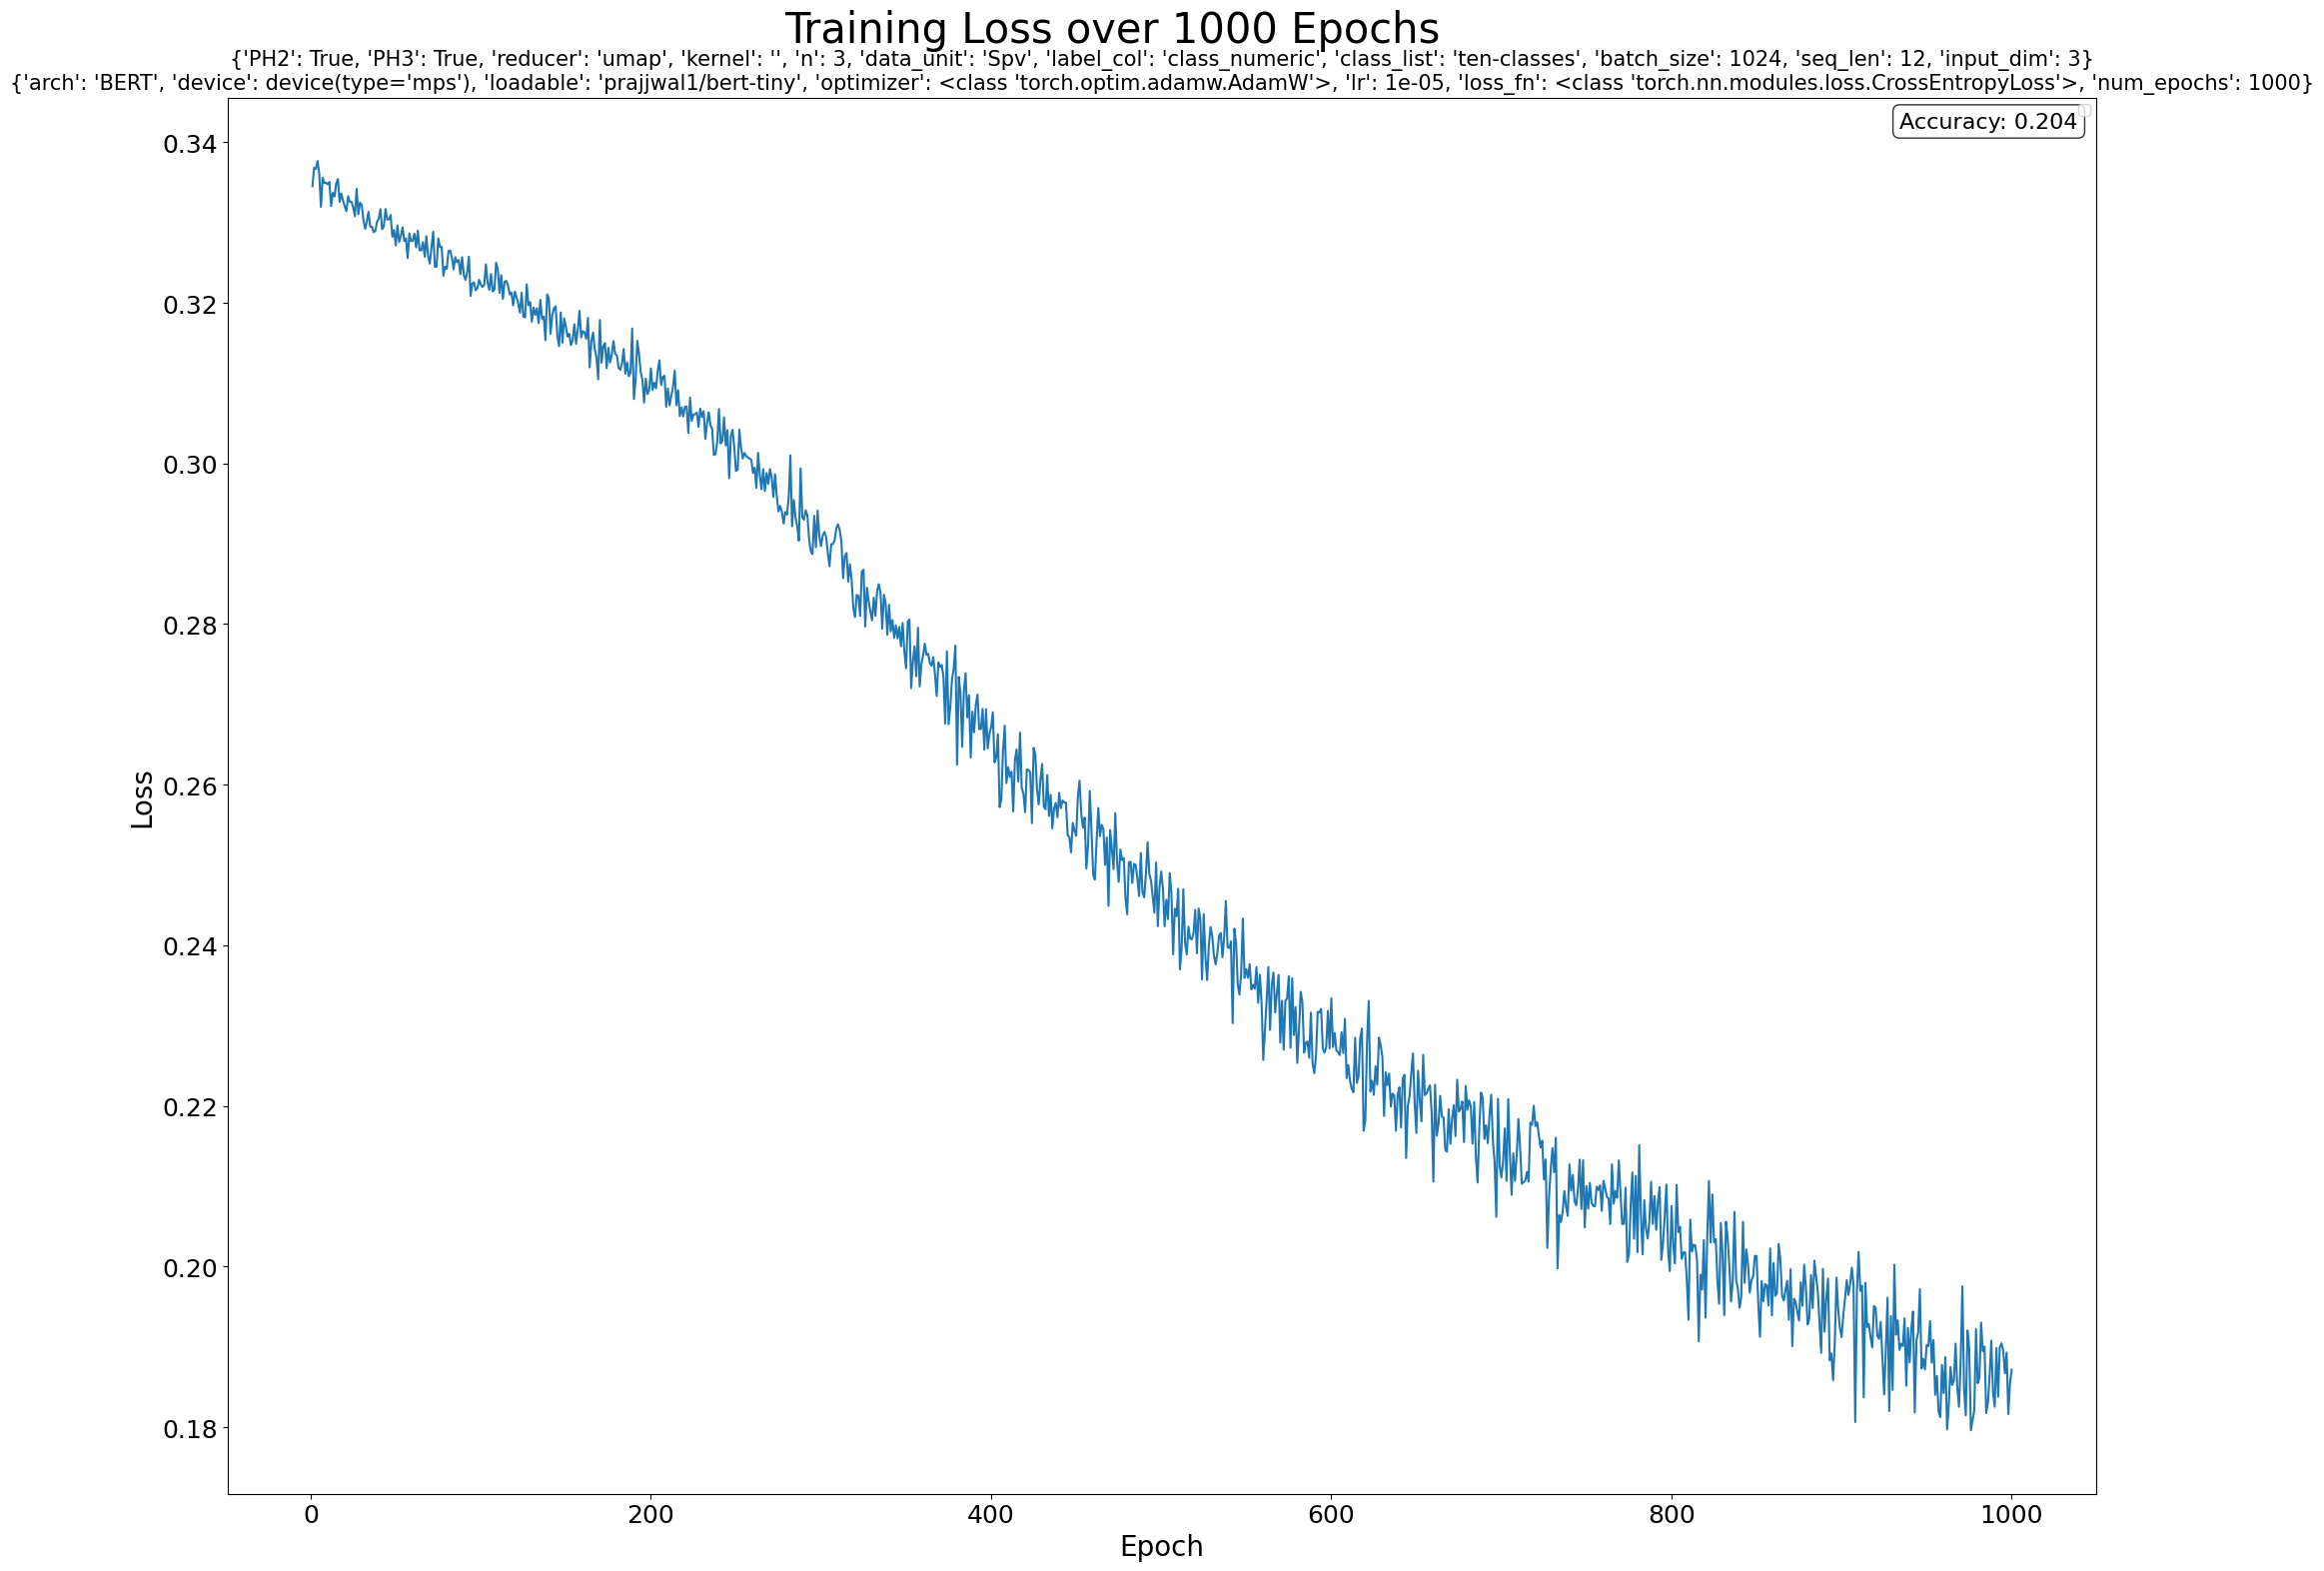

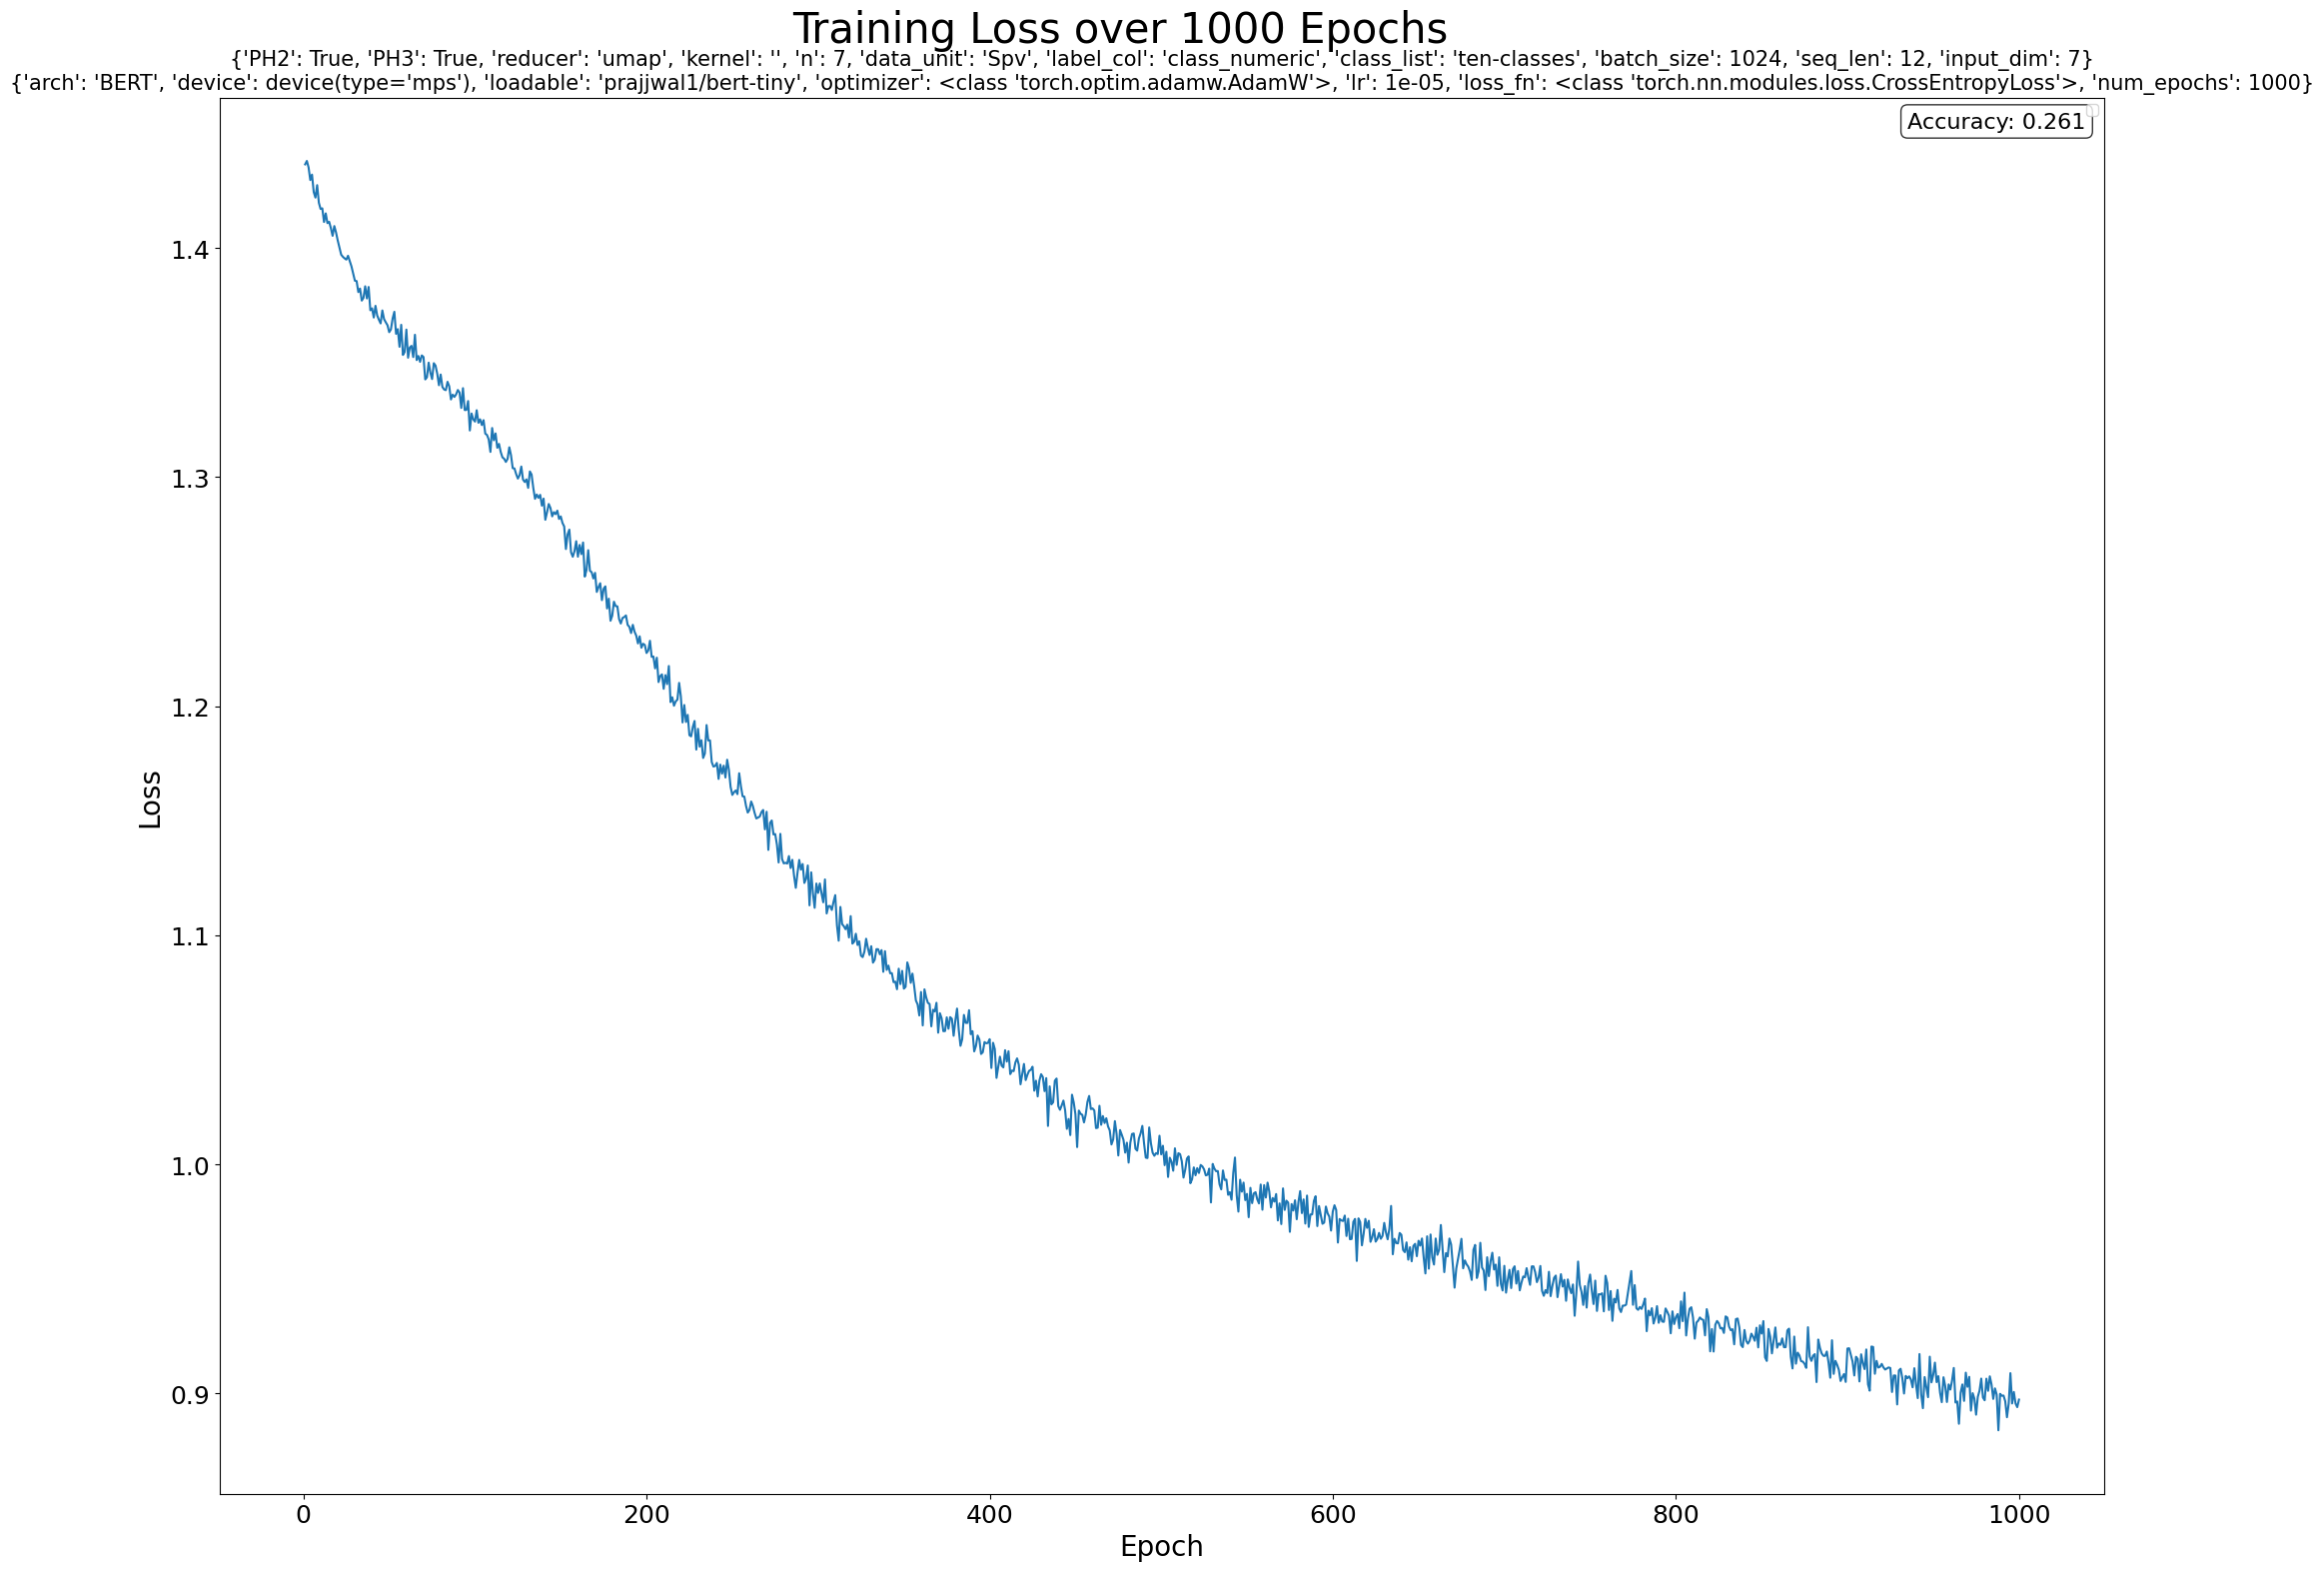

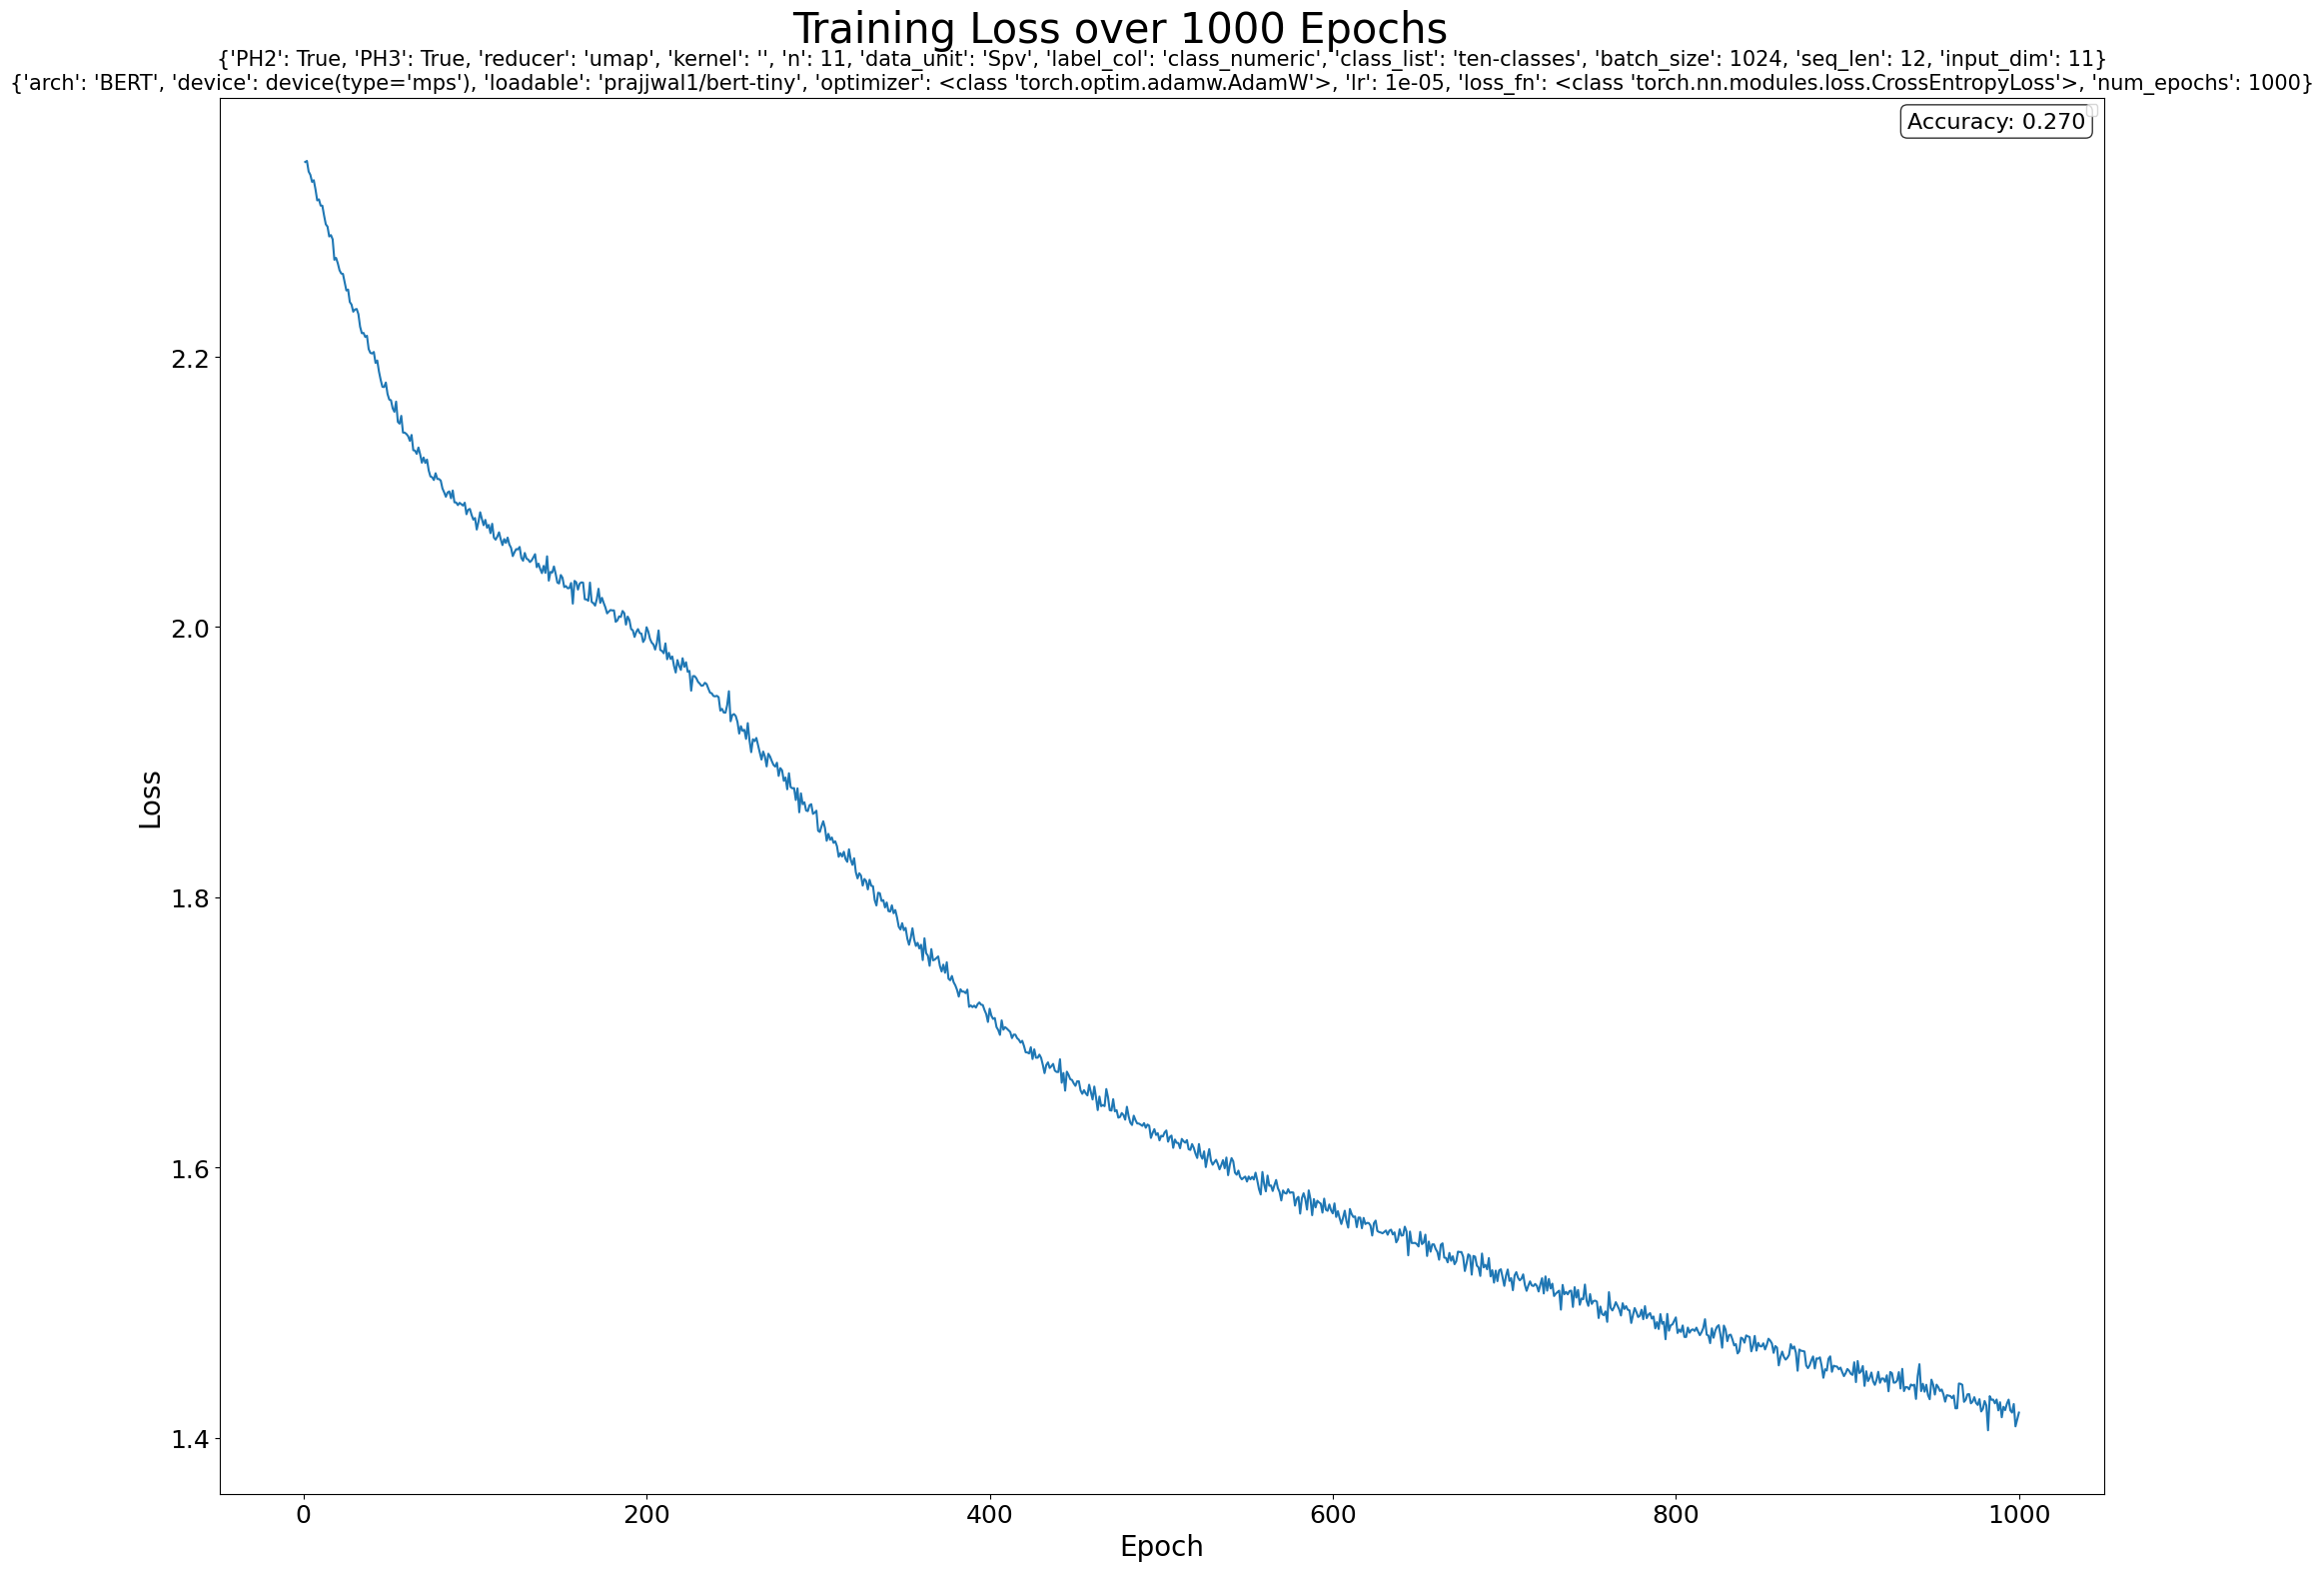

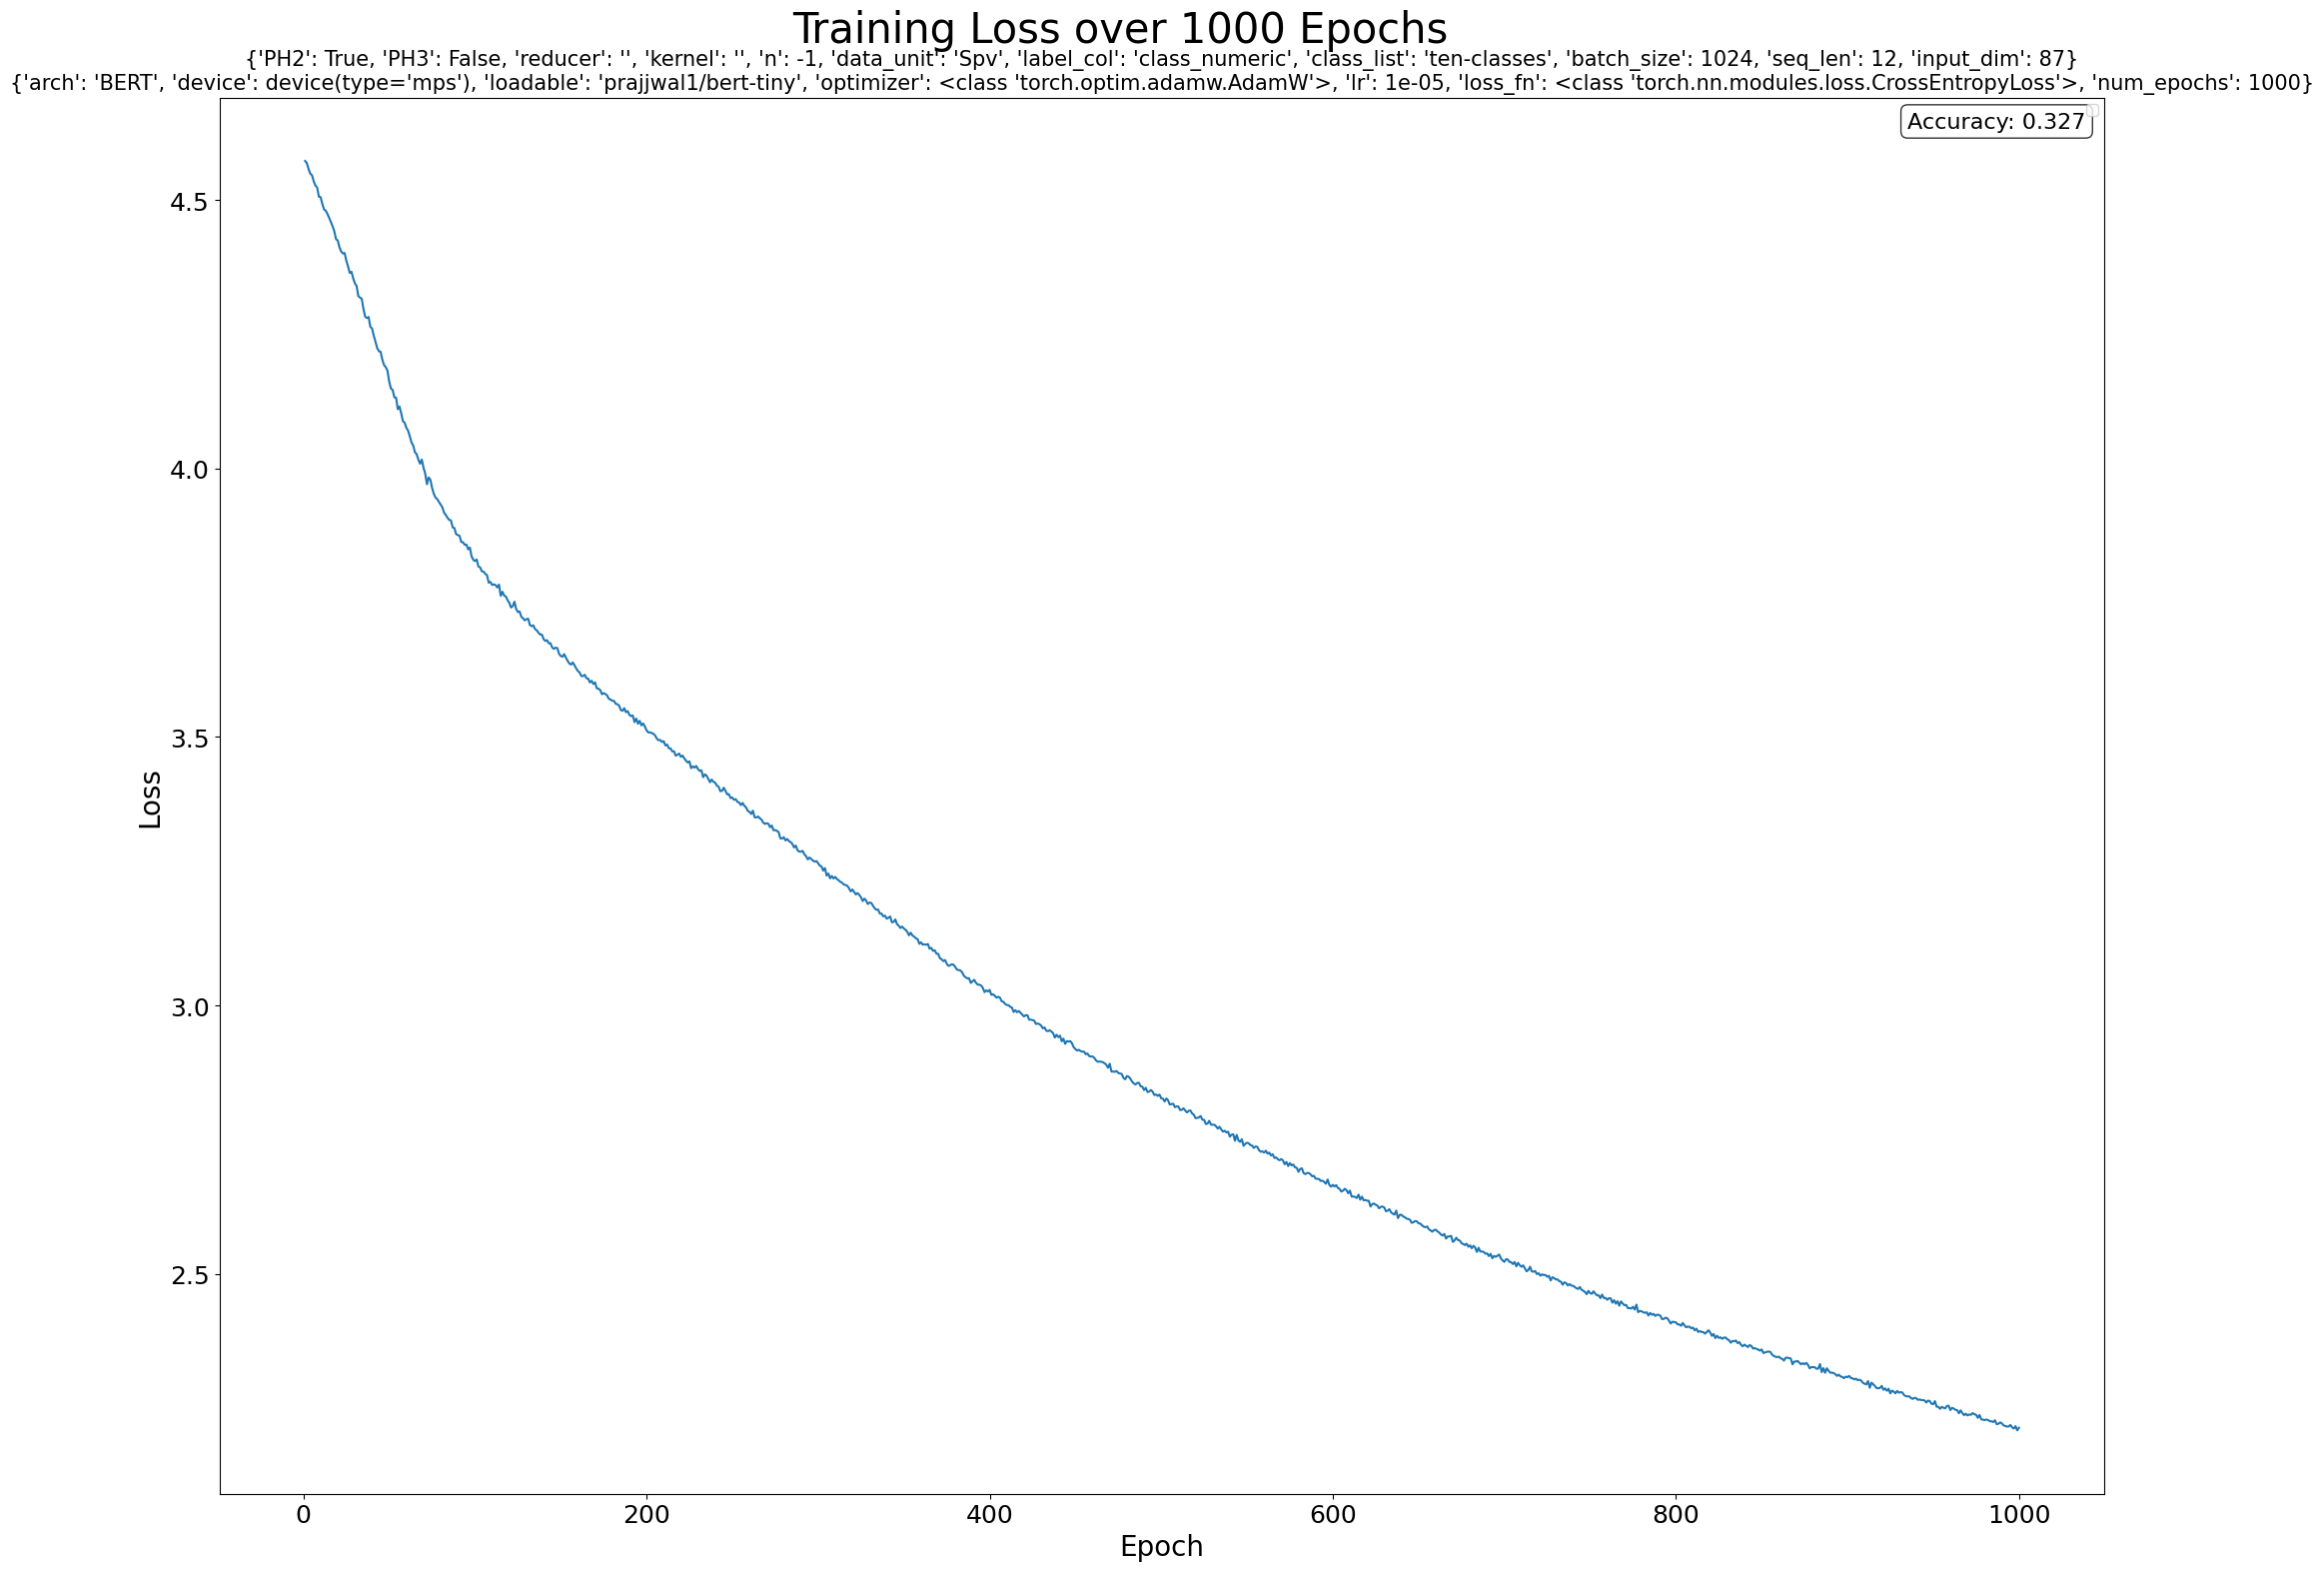

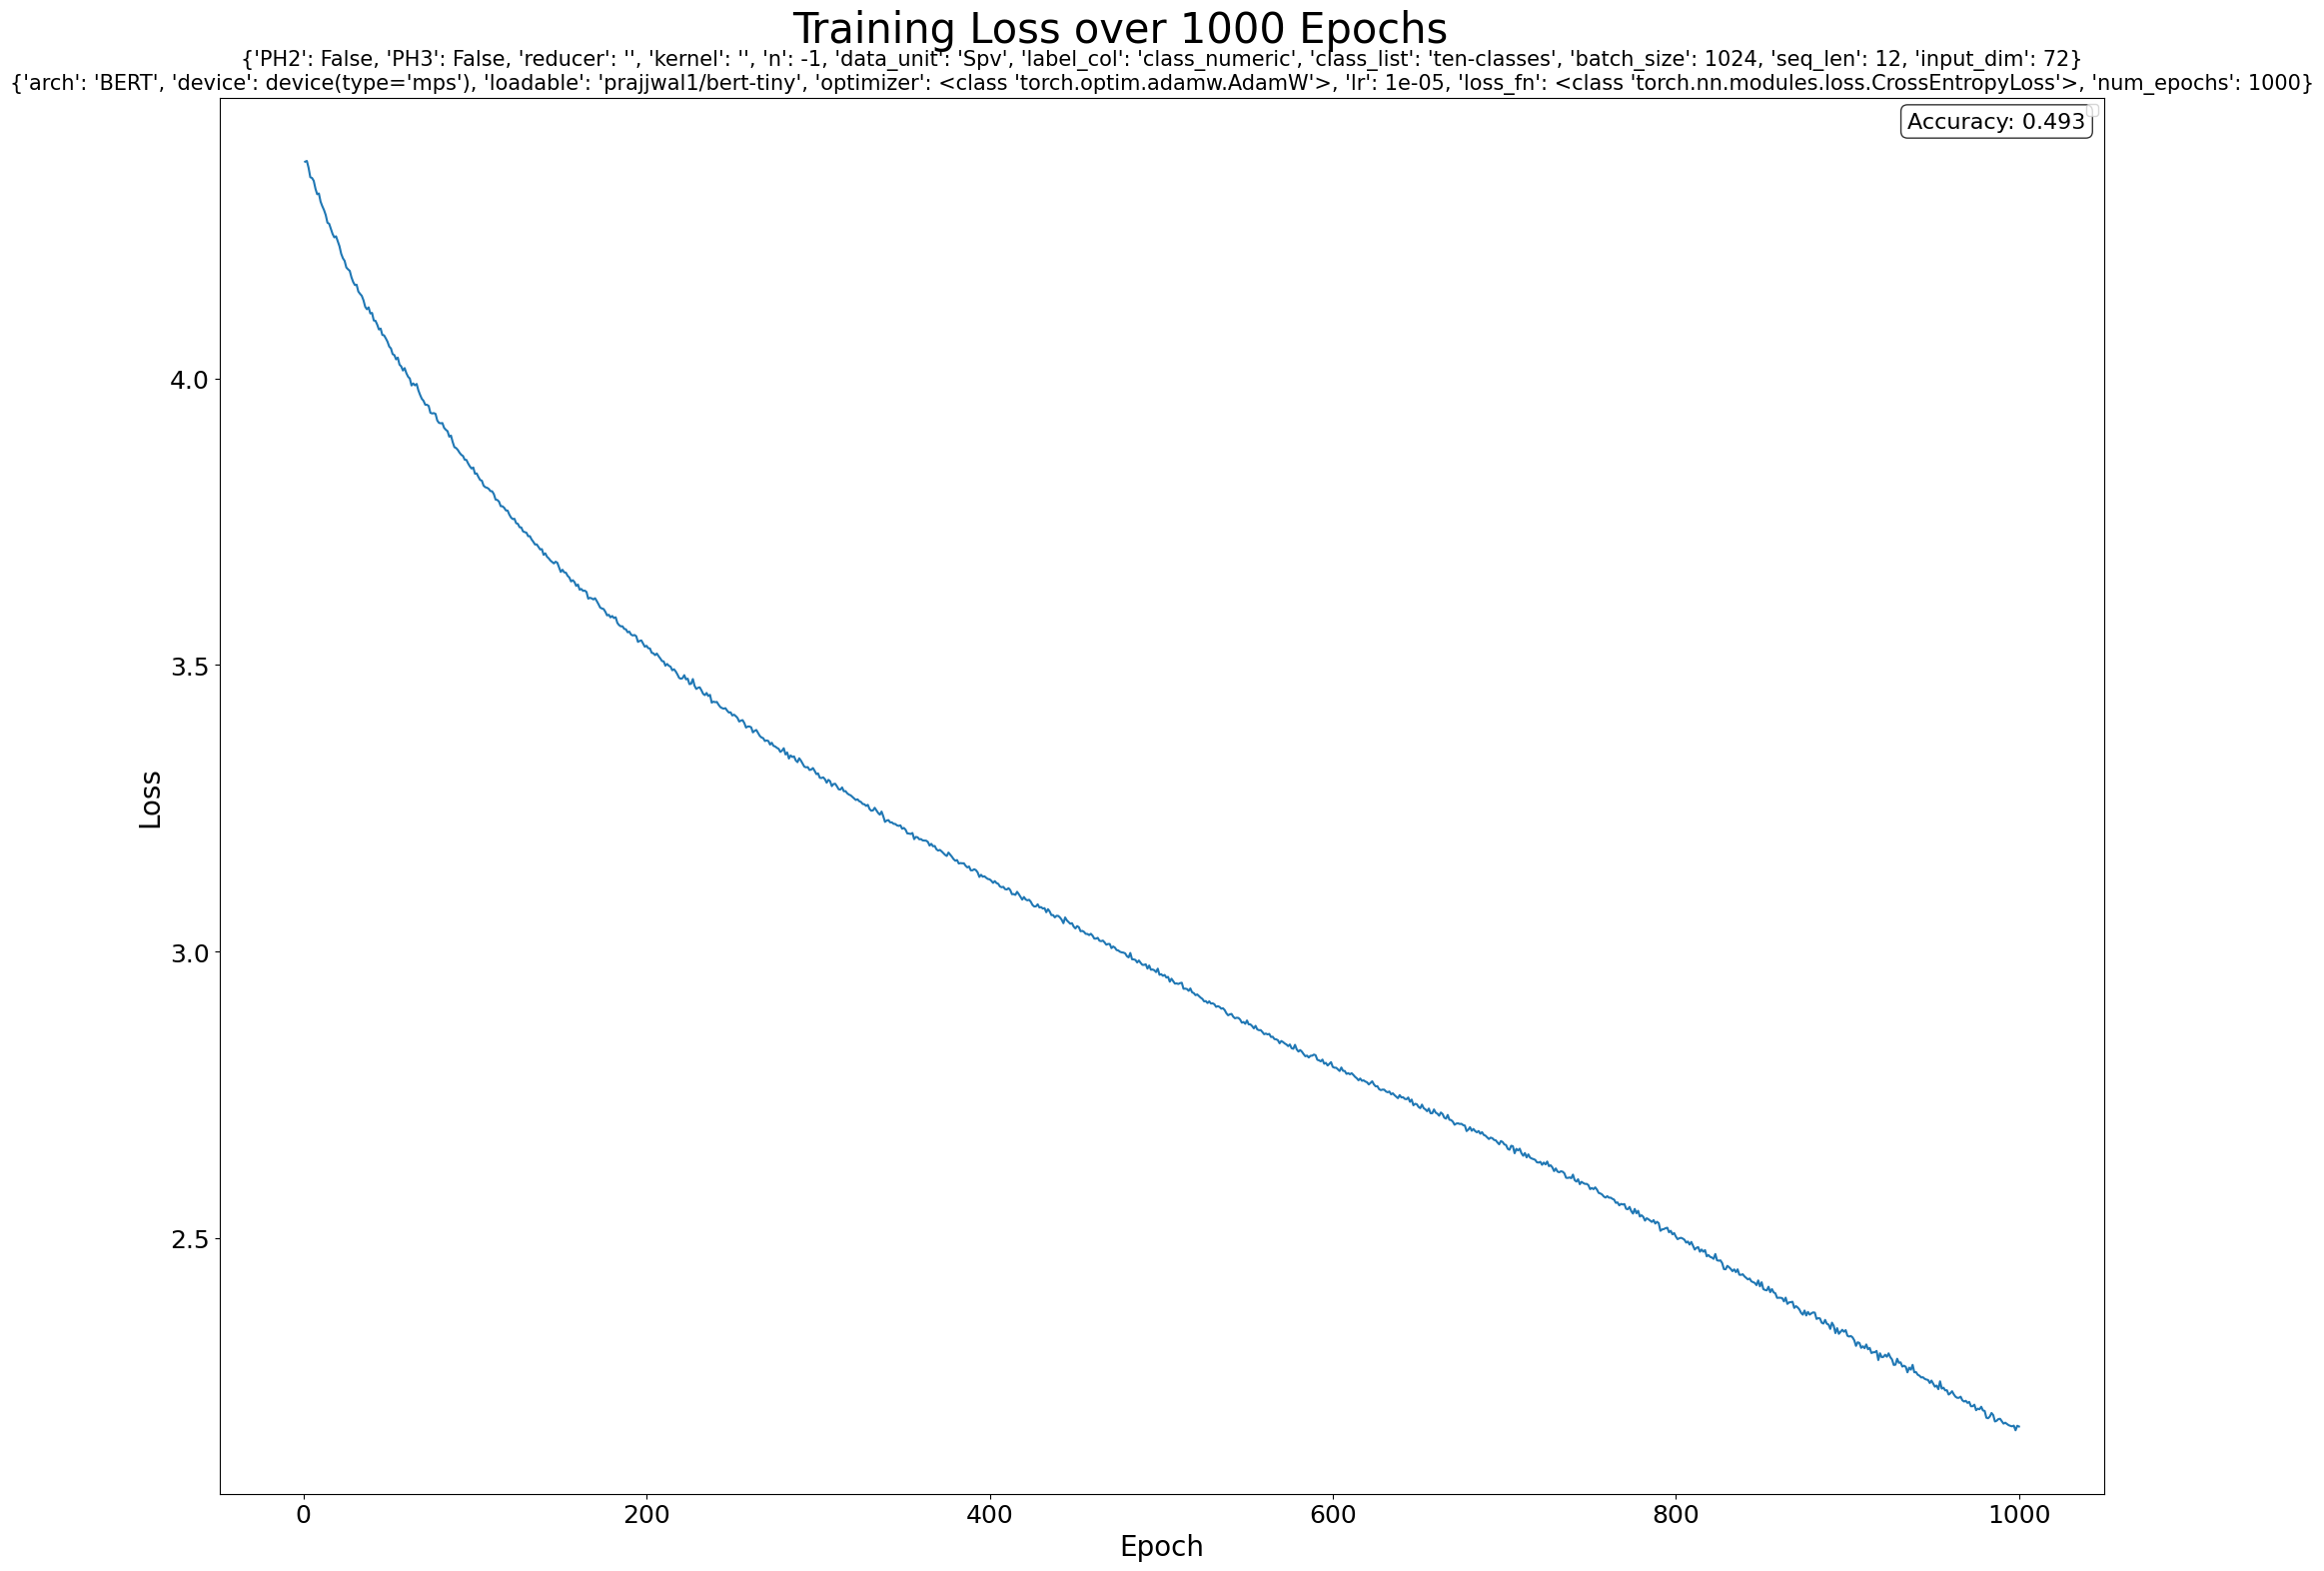

In [13]:
bert.find_best(sup.DATA_S_PV, sup.class_numeric_column, TRAIN_classes, 
                    LOADABLE_CANDIDATES=[exploringBERT], 
                    num_epochs_CANDIDATES=[exploring_num_epochs])

In [14]:
spv_bert_scores_df = pd.DataFrame(sup.bert_score_tracker, columns=sup.bert_scores_columns)
now = datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
sup.create_dir_if_not_exists(os.path.join(sup.TRAIN_SCORES_ROOT, TRAIN_classes, 
                                          sup.TRAIN_BERT_CODE,
                                          sup.DATA_S_PV,
                                          exploringBERT))
spv_bert_scores_df.to_csv(os.path.join(sup.TRAIN_SCORES_ROOT, TRAIN_classes, 
                                       sup.TRAIN_BERT_CODE,
                                       sup.DATA_S_PV,
                                       exploringBERT, 
                                       f"{now}.csv"), index=False)

Directory /Users/diego/Desktop/iteso/TOG/scores/ten-classes/BERT/Spv/prajjwal1/bert-tiny does not exist. Creating it and continuing with execution
